## Superfund cleanups and near-port community socioeconomic composition for Seattle 

Ashli Blow 

### Import Data & Packages

In [2]:
import os
import requests

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
import xyzservices.providers as xyz

In [3]:
datadir = '/home/jovyan/superfund-gentrification/Data'
fixed_fn = '/home/jovyan/superfund-gentrification/Data/fixed_effects.csv'
socio_stand_fn = '/home/jovyan/superfund-gentrification/Data/socio_stand.csv'
socio_nom_fn = '/home/jovyan/superfund-gentrification/Data/socio_nom_income _west_coast.csv'

### Seattle Polygon

<Axes: >

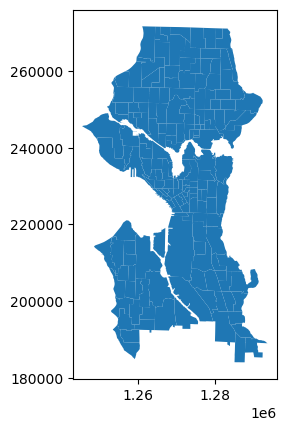

In [4]:
seattle_gdf = gpd.read_file('/home/jovyan/superfund-gentrification/Data/2020_Census_Tracts_Seattle.geojson')
seattle_gdf.plot()

In [5]:
seattle_gdf = seattle_gdf.rename(columns={'TRACT_NUMB': 'tracts'})
seattle_gdf.head()

OBJECTID      GEOID20  GROSS_ACRES  LAND_ACRES  WATER_ACRES  \
0         1  53033000402   444.493643  444.527261     0.000000   
1         2  53033000403   180.930716  165.408389    15.535762   
2         3  53033000700   319.838996  319.862596     0.000000   
3         4  53033003302   154.942826  154.952619     0.000000   
4         5  53033003601   166.571397  166.583375     0.000000   

                 NAME  tracts BASENAME               UVDA_AREA  CRA_NO  \
0   Census Tract 4.02     402     4.02     Bitter Lake Village     9.1   
1   Census Tract 4.03     403     4.03     Bitter Lake Village     9.1   
2      Census Tract 7     700        7               Lake City     8.2   
3  Census Tract 33.02    3302    33.02                 Ballard    10.2   
4  Census Tract 36.01    3601    36.01  Green Lake - Roosevelt     9.4   

   CRA_GRP                      GEN_ALIAS  \
0        9          Broadview/Bitter Lake   
1        9          Broadview/Bitter Lake   
2        8  Olympic Hills/Victory Heights   
3       10               Whittier Heights   
4        9                     Green Lake   

                                          DETL_NAMES  C_DISTRICT  \
0                             Broadview, Bitter Lake           5   
1                             Broadview, Bitter Lake           5   
2  Lake City, Victory Heights, Olympic Hills, Pin...           5   
3        Whittier Heights, Loyal Heights, Crown Hill           6   
4     Green Lake, Meridian, Roosevelt, Woodland Park           6   

                                            geometry  
0  POLYGON ((1267598.433 267477.138, 1267788.924 ...  
1  POLYGON ((1265848.993 271492.767, 1265842.812 ...  
2  POLYGON ((1277629.018 265876.292, 1277833.975 ...  
3  POLYGON ((1262877.612 251639.607, 1262891.039 ...  
4  POLYGON ((1274839.167 250046.877, 1274833.189 ...

### Fixed Effects

In [6]:
#projecting to AEA
fixed_df = pd.read_csv(fixed_fn)
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
fixed_gdf = gpd.GeoDataFrame(fixed_df, crs='EPSG:4326', geometry=gpd.points_from_xy(fixed_df['lon'], fixed_df['lat']))
fixed_gdf_aea = fixed_gdf.to_crs(aea_proj_str)
fixed_gdf_aea

site  sitescore      state  \
0                     Redwing Carriers, Inc. (Saraland)      30.83    Alabama   
1                 Stauffer Chemical Co. (LeMoyne Plant)      32.34    Alabama   
2                                Triana/Tennessee River      61.42    Alabama   
3              Stauffer Chemical Co. (Cold Creek Plant)      46.77    Alabama   
4     T.H. Agriculture & Nutrition Co. (Montgomery P...      44.46    Alabama   
...                                                 ...        ...        ...   
1742                Oconomowoc Electroplating Co., Inc.      31.86  Wisconsin   
1743                                Penta Wood Products      50.00  Wisconsin   
1744                         F.E. Warren Air Force Base      39.23    Wyoming   
1745                  Mystery Bridge Rd/U.S. Highway 20      32.10    Wyoming   
1746                  Baxter/Union Pacific Tie Treating      37.24    Wyoming   

                          county               city           street      zip  \
0                         Mobile           Saraland         Craig Dr  36571.0   
1                         Mobile               Axis            US 43  36560.0   
2     Limestone, Madison, Morgan  Limestone, Morgan  Signal Point Dr  35754.0   
3                         Mobile              Bucks            US 43  36560.0   
4                     Montgomery         Montgomery   Birmingham Hwy  36108.0   
...                          ...                ...              ...      ...   
1742                       Dodge           Ashippun       573 Oak St  53003.0   
1743                     Burnett            Daniels       Daniels 70  54872.0   
1744                     Laramie           Cheyenne    Ft Warren Ave  82001.0   
1745                     Natrona         Evansville    Broomtail Trl  82636.0   
1746                      Albany            Laramie             I-80  82070.0   

            lat         lon  state_fips  ...    tracts    tract_fips  \
0     30.808331  -88.073061         1.0  ...    5400.0  1.097005e+09   
1     30.969439  -88.017500         1.0  ...    5702.0  1.097006e+09   
2     34.508888  -86.638194         1.0  ...    5704.0  1.103006e+09   
3     30.975000  -88.021389         1.0  ...    5800.0  1.097006e+09   
4     32.376100  -86.379100         1.0  ...    6000.0  1.101006e+09   
...         ...         ...         ...  ...       ...           ...   
1742  43.214100  -88.522100        55.0  ...  961500.0  5.502796e+10   
1743  45.784508  -92.431204        55.0  ...  970800.0  5.501397e+10   
1744  41.156669 -104.862200        56.0  ...    1100.0  5.602100e+10   
1745  42.860581 -106.228800        56.0  ...    1801.0  5.602500e+10   
1746  41.295000 -105.601700        56.0  ...  962700.0  5.600196e+10   

            status_epa states_plaintalk status_binary  cercla1990  cercla2000  \
0     Deleted NPL Site        Completed             1           0           0   
1             NPL Site       In Process             0           0           0   
2             NPL Site       In Process             0           0           0   
3             NPL Site       In Process             0           0           0   
4             NPL Site       In Process             0           0           0   
...                ...              ...           ...         ...         ...   
1742          NPL Site       In Process             0           0           0   
1743          NPL Site       In Process             0           0           0   
1744          NPL Site       In Process             0           0           0   
1745  Deleted NPL Site        Completed             1           0           0   
1746  Deleted NPL Site        Completed             1           1           1   

      cercla2010  cercla2020                         geometry  
0              1           1  POINT (2500797.782 -855198.329)  
1              0           0  POINT (2500633.447 -836762.935)  
2              0           0  POINT (2504565.873 -426248.662)  
3          

### Race Variables

The following code creates the percentage of racial and ethnicity groups by Census tracts. 

In [7]:
socio_stand = pd.read_csv(socio_stand_fn)
socio_stand_df = pd.DataFrame(socio_stand)
socio_stand_df.head()

socio_stand_gdf = gpd.GeoDataFrame(socio_stand_df)
socio_stand_gdf.head()

state  statefip           county  countyfip  tract  18under1990  \
0  California         6    Colusa County         11    100      1222.48   
1  California         6    Fresno County         19    100        19.00   
2  California         6  Humboldt County         23    100       913.00   
3  California         6      Inyo County         27    100       662.01   
4  California         6     Kings County         31    100      1063.10   

   18under2000  18under2010  18under2020  18over1990  ...  nhpi2010  nhpi2020  \
0      1486.95         1600       1543.0     2577.91  ...        10       9.0   
1        28.00           16         96.0     2253.00  ...         2      11.0   
2       927.00          814        852.0     2927.00  ...        32      67.0   
3       708.03          613        598.0     2050.07  ...         3       0.0   
4      1007.10          965        744.0     2481.29  ...         1       4.0   

   gqi1990  gqi2000  gqi2010  gqi2020  gqni1990  gqni2000  gqni2010  gqni2020  
0      0.0      5.0        0      0.0     71.14       0.0         0       0.0  
1   1816.0   2318.0     2344   2793.0      0.00      21.0        23      84.0  
2      0.0      0.0       12     21.0     93.00     206.0       763     634.0  
3      0.0      0.0        0      0.0      0.00       2.0         8       0.0  
4      0.0      0.0        0      0.0      0.00      10.0         8       0.0  

[5 rows x 53 columns]

In [8]:
race = socio_stand_gdf[['state', 'statefip', 'county', 'countyfip', 'tract',
                        'white1990', 'black1990', 'aian1990', 'asian1990', 'nhpi1990', 'hl1990', 
                        'white2000', 'black2000', 'aian2000', 'asian2000', 'nhpi2000', 'hl2000', 
                        'white2010', 'black2010', 'aian2010', 'asian2010', 'nhpi2010', 'hl2010', 
                        'white2020', 'black2020', 'aian2020', 'asian2020', 'nhpi2020', 'hl2020']]

race_df = pd.concat([race], axis=1)
race_df.head()

state  statefip           county  countyfip  tract  white1990  \
0  California         6    Colusa County         11    100    2628.25   
1  California         6    Fresno County         19    100     718.00   
2  California         6  Humboldt County         23    100    3302.00   
3  California         6      Inyo County         27    100    2608.08   
4  California         6     Kings County         31    100    2783.33   

   black1990  aian1990  asian1990  nhpi1990  ...  aian2010  asian2010  \
0        8.0      45.0      20.00      6.00  ...        65         41   
1      437.0      22.0      45.00      0.00  ...        36        130   
2       82.0     205.0     171.00      9.00  ...       179        151   
3        2.0      33.0      25.00      1.00  ...        40         48   
4        9.0       7.0      40.03      1.01  ...        34         53   

   nhpi2010  hl2010  white2020  black2020  aian2020  asian2020  nhpi2020  \
0        10    3120     2358.0       37.0      71.0       52.0       9.0   
1         2    1594     1180.0      574.0      77.0       60.0      11.0   
2        32     693     2945.0      142.0     231.0      234.0      67.0   
3         3     512     1933.0        4.0      68.0       48.0       0.0   
4         1    1321     1847.0       23.0      21.0       45.0       4.0   

   hl2020  
0  3528.0  
1  2068.0  
2   993.0  
3   842.0  
4  1154.0  

[5 rows x 29 columns]

In [9]:
#creating a percentage of each racial and ethnicity group. 

races = ['white', 'black', 'aian', 'asian', 'nhpi', 'hl']

years = ['1990', '2000', '2010', '2020']

for year in years:
    total_population = race_df[[f'{race}{year}' for race in races]].sum(axis=1)
    for race in races:
        race_df[f'per{race}{year}'] = race_df[f'{race}{year}'] / total_population

per_race_df = race_df[['state', 'statefip', 'county', 'countyfip', 'tract'] + [f'per{race}{year}' for race in races for year in years]]

per_race_df

state  statefip            county  countyfip   tract  \
0      California         6     Colusa County         11     100   
1      California         6     Fresno County         19     100   
2      California         6   Humboldt County         23     100   
3      California         6       Inyo County         27     100   
4      California         6      Kings County         31     100   
...           ...       ...               ...        ...     ...   
10344  Washington        53   San Juan County         55  990100   
10345  Washington        53     Skagit County         57  990100   
10346  Washington        53  Snohomish County         61  990100   
10347  Washington        53   Thurston County         67  990100   
10348  Washington        53     Island County         29  992201   

       perwhite1990  perwhite2000  perwhite2010  perwhite2020  perblack1990  \
0          0.592547      0.490350      0.502365      0.389430      0.001804   
1          0.296205      0.318500      0.484198      0.297229      0.180281   
2          0.821802      0.765889      0.761735      0.638552      0.020408   
3          0.919928      0.883949      0.796117      0.667703      0.000705   
4          0.716349      0.690061      0.642396      0.596962      0.002316   
...             ...           ...           ...           ...           ...   
10344           NaN           NaN           NaN           NaN           NaN   
10345           NaN           NaN           NaN      0.444444           NaN   
10346           NaN           NaN           NaN           NaN           NaN   
10347           NaN           NaN           NaN           NaN           NaN   
10348           NaN           NaN           NaN           NaN           NaN   

       ...  perasian2010  perasian2020  pernhpi1990  pernhpi2000  pernhpi2010  \
0      ...      0.006257      0.008588     0.001353     0.003374     0.001526   
1      ...      0.029988      0.015113     0.000000     0.000954     0.000461   
2      ...      0.029907      0.050737     0.002240     0.002080     0.006338   
3      ...      0.016070      0.016580     0.000353     0.000000     0.001004   
4      ...      0.013171      0.014544     0.000260     0.002996     0.000249   
...    ...           ...           ...          ...          ...          ...   
10344  ...           NaN           NaN          NaN          NaN          NaN   
10345  ...           NaN      0.000000          NaN          NaN          NaN   
10346  ...           NaN           NaN          NaN          NaN          NaN   
10347  ...           NaN           NaN          NaN          NaN          NaN   
10348  ...           NaN           NaN          NaN          NaN          NaN   

       pernhpi2020  perhl1990  perhl2000  perhl2010  perhl2020  
0         0.001486   0.389642   0.480971   0.476118   0.582659  
1         0.002771   0.495875   0.486650   0.367705   0.520907  
2         0.014527   0.061971   0.120176   0.137255   0.215308  
3         0.000000   0.058555   0.095047   0.171409   0.290846  
4         0.001293   0.268971   0.282431   0.328280   0.372980  
...            ...        ...        ...        ...        ...  
10344          NaN        NaN        NaN        NaN        NaN  
10345     0.000000        NaN        NaN        NaN   0.500000  
10346          NaN        NaN        NaN        NaN        NaN  
10347          NaN        NaN        NaN        NaN        NaN  
10348          NaN        NaN        NaN        NaN        NaN  

[10349 rows x 29 columns]

In [10]:
per_race_df = per_race_df.rename(columns={'tract': 'tracts'})
per_race_df.head()

state  statefip           county  countyfip  tracts  perwhite1990  \
0  California         6    Colusa County         11     100      0.592547   
1  California         6    Fresno County         19     100      0.296205   
2  California         6  Humboldt County         23     100      0.821802   
3  California         6      Inyo County         27     100      0.919928   
4  California         6     Kings County         31     100      0.716349   

   perwhite2000  perwhite2010  perwhite2020  perblack1990  ...  perasian2010  \
0      0.490350      0.502365      0.389430      0.001804  ...      0.006257   
1      0.318500      0.484198      0.297229      0.180281  ...      0.029988   
2      0.765889      0.761735      0.638552      0.020408  ...      0.029907   
3      0.883949      0.796117      0.667703      0.000705  ...      0.016070   
4      0.690061      0.642396      0.596962      0.002316  ...      0.013171   

   perasian2020  pernhpi1990  pernhpi2000  pernhpi2010  pernhpi2020  \
0      0.008588     0.001353     0.003374     0.001526     0.001486   
1      0.015113     0.000000     0.000954     0.000461     0.002771   
2      0.050737     0.002240     0.002080     0.006338     0.014527   
3      0.016580     0.000353     0.000000     0.001004     0.000000   
4      0.014544     0.000260     0.002996     0.000249     0.001293   

   perhl1990  perhl2000  perhl2010  perhl2020  
0   0.389642   0.480971   0.476118   0.582659  
1   0.495875   0.486650   0.367705   0.520907  
2   0.061971   0.120176   0.137255   0.215308  
3   0.058555   0.095047   0.171409   0.290846  
4   0.268971   0.282431   0.328280   0.372980  

[5 rows x 29 columns]

#### Income Data 

### Merge Seattle Polygon and Race Data

This will focus on the Asian, Hispanic-Latino, and Asian popultation, because the regression analysis in the states notebook showed statistical significance of change for those populations. 

In [11]:
sea_race_gdf = seattle_gdf.merge(per_race_df, on="tracts", how="left")
sea_race_gdf

OBJECTID      GEOID20  GROSS_ACRES  LAND_ACRES  WATER_ACRES  \
0            1  53033000402   444.493643  444.527261          0.0   
1            1  53033000402   444.493643  444.527261          0.0   
2            1  53033000402   444.493643  444.527261          0.0   
3            1  53033000402   444.493643  444.527261          0.0   
4            1  53033000402   444.493643  444.527261          0.0   
...        ...          ...          ...         ...          ...   
1030       370  53033011700   868.762098  868.775078          0.0   
1031       370  53033011700   868.762098  868.775078          0.0   
1032       370  53033011700   868.762098  868.775078          0.0   
1033       371  53033011901   415.718564  415.723669          0.0   
1034       371  53033011901   415.718564  415.723669          0.0   

                     NAME  tracts BASENAME            UVDA_AREA  CRA_NO  ...  \
0       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
1       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
2       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
3       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
4       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
...                   ...     ...      ...                  ...     ...  ...   
1030     Census Tract 117   11700      117        Rainier Beach     3.4  ...   
1031     Census Tract 117   11700      117        Rainier Beach     3.4  ...   
1032     Census Tract 117   11700      117        Rainier Beach     3.4  ...   
1033  Census Tract 119.01   11901   119.01  Outside - Southeast     4.1  ...   
1034  Census Tract 119.01   11901   119.01  Outside - Southeast     4.1  ...   

      perasian2010 perasian2020 pernhpi1990  pernhpi2000 pernhpi2010  \
0         0.008362     0.012823    0.000989     0.000211    0.002040   
1         0.025820     0.027793    0.000234     0.000323    0.001913   
2         0.050326     0.058332    0.004236     0.000747    0.001338   
3         0.013290     0.011163    0.000295     0.000265    0.000462   
4         0.012893     0.010448    0.001175     0.000489    0.002125   
...            ...          ...         ...          ...         ...   
1030      0.457990     0.419130    0.005747     0.003378    0.001647   
1031      0.016234     0.018411    0.000000     0.003320    0.000738   
1032      0.505756     0.503330    0.020615     0.014903    0.006030   
1033      0.258459     0.301259    0.005838     0.002420    0.002854   
1034      0.034989     0.040145    0.001358     0.002039    0.000625   

     pernhpi2020  perhl1990 perhl2000  perhl2010  perhl2020  
0       0.003784   0.045477  0.057195   0.083010   0.110153  
1       0.002417   0.051224  0.089692   0.111749   0.160177  
2       0.002089   0.172258  0.307123   0.344090   0.413845  
3       0.000627   0.139593  0.167638   0.198891   0.250094  
4       0.002687   0.036220  0.059446   0.071833   0.089403  
...          ...        ...       ...        ...        ...  
1030    0.002149   0.061167  0.081081   0.093904   0.124664  
1031    0.001416   0.208624  0.259282   0.320625   0.430668  
1032    0.009804   0.049026  0.062455   0.065595   0.085461  
1033    0.005845   0.058382  0.068979   0.089686   0.098921  
1034    0.000329   0.075382  0.096193   0.129022   0.176045  

[1035 rows x 43 columns]

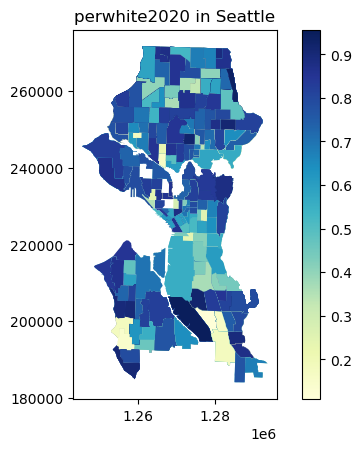

In [12]:
#Testing outcome
fig, ax = plt.subplots(1, 1)
sea_race_gdf.plot(column='perwhite2020', ax=ax, legend=True, cmap='YlGnBu')
plt.title('perwhite2020 in Seattle')
plt.show()

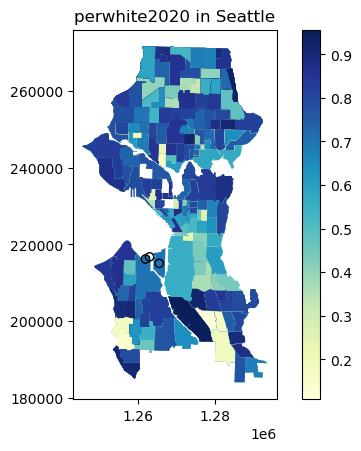

In [13]:
# Adding fixed effects 
fixed_gdf_aea = fixed_gdf_aea.to_crs(sea_race_gdf.crs)

fixed_gdf_aea_clipped = gpd.clip(fixed_gdf_aea, sea_race_gdf)

fig, ax = plt.subplots(1, 1)

sea_race_gdf.plot(column='perwhite2020', ax=ax, legend=True, cmap='YlGnBu')

fixed_gdf_aea_clipped.plot(ax=ax, color='none', edgecolor='black')

plt.title('perwhite2020 in Seattle')
plt.show()

#### Asian population

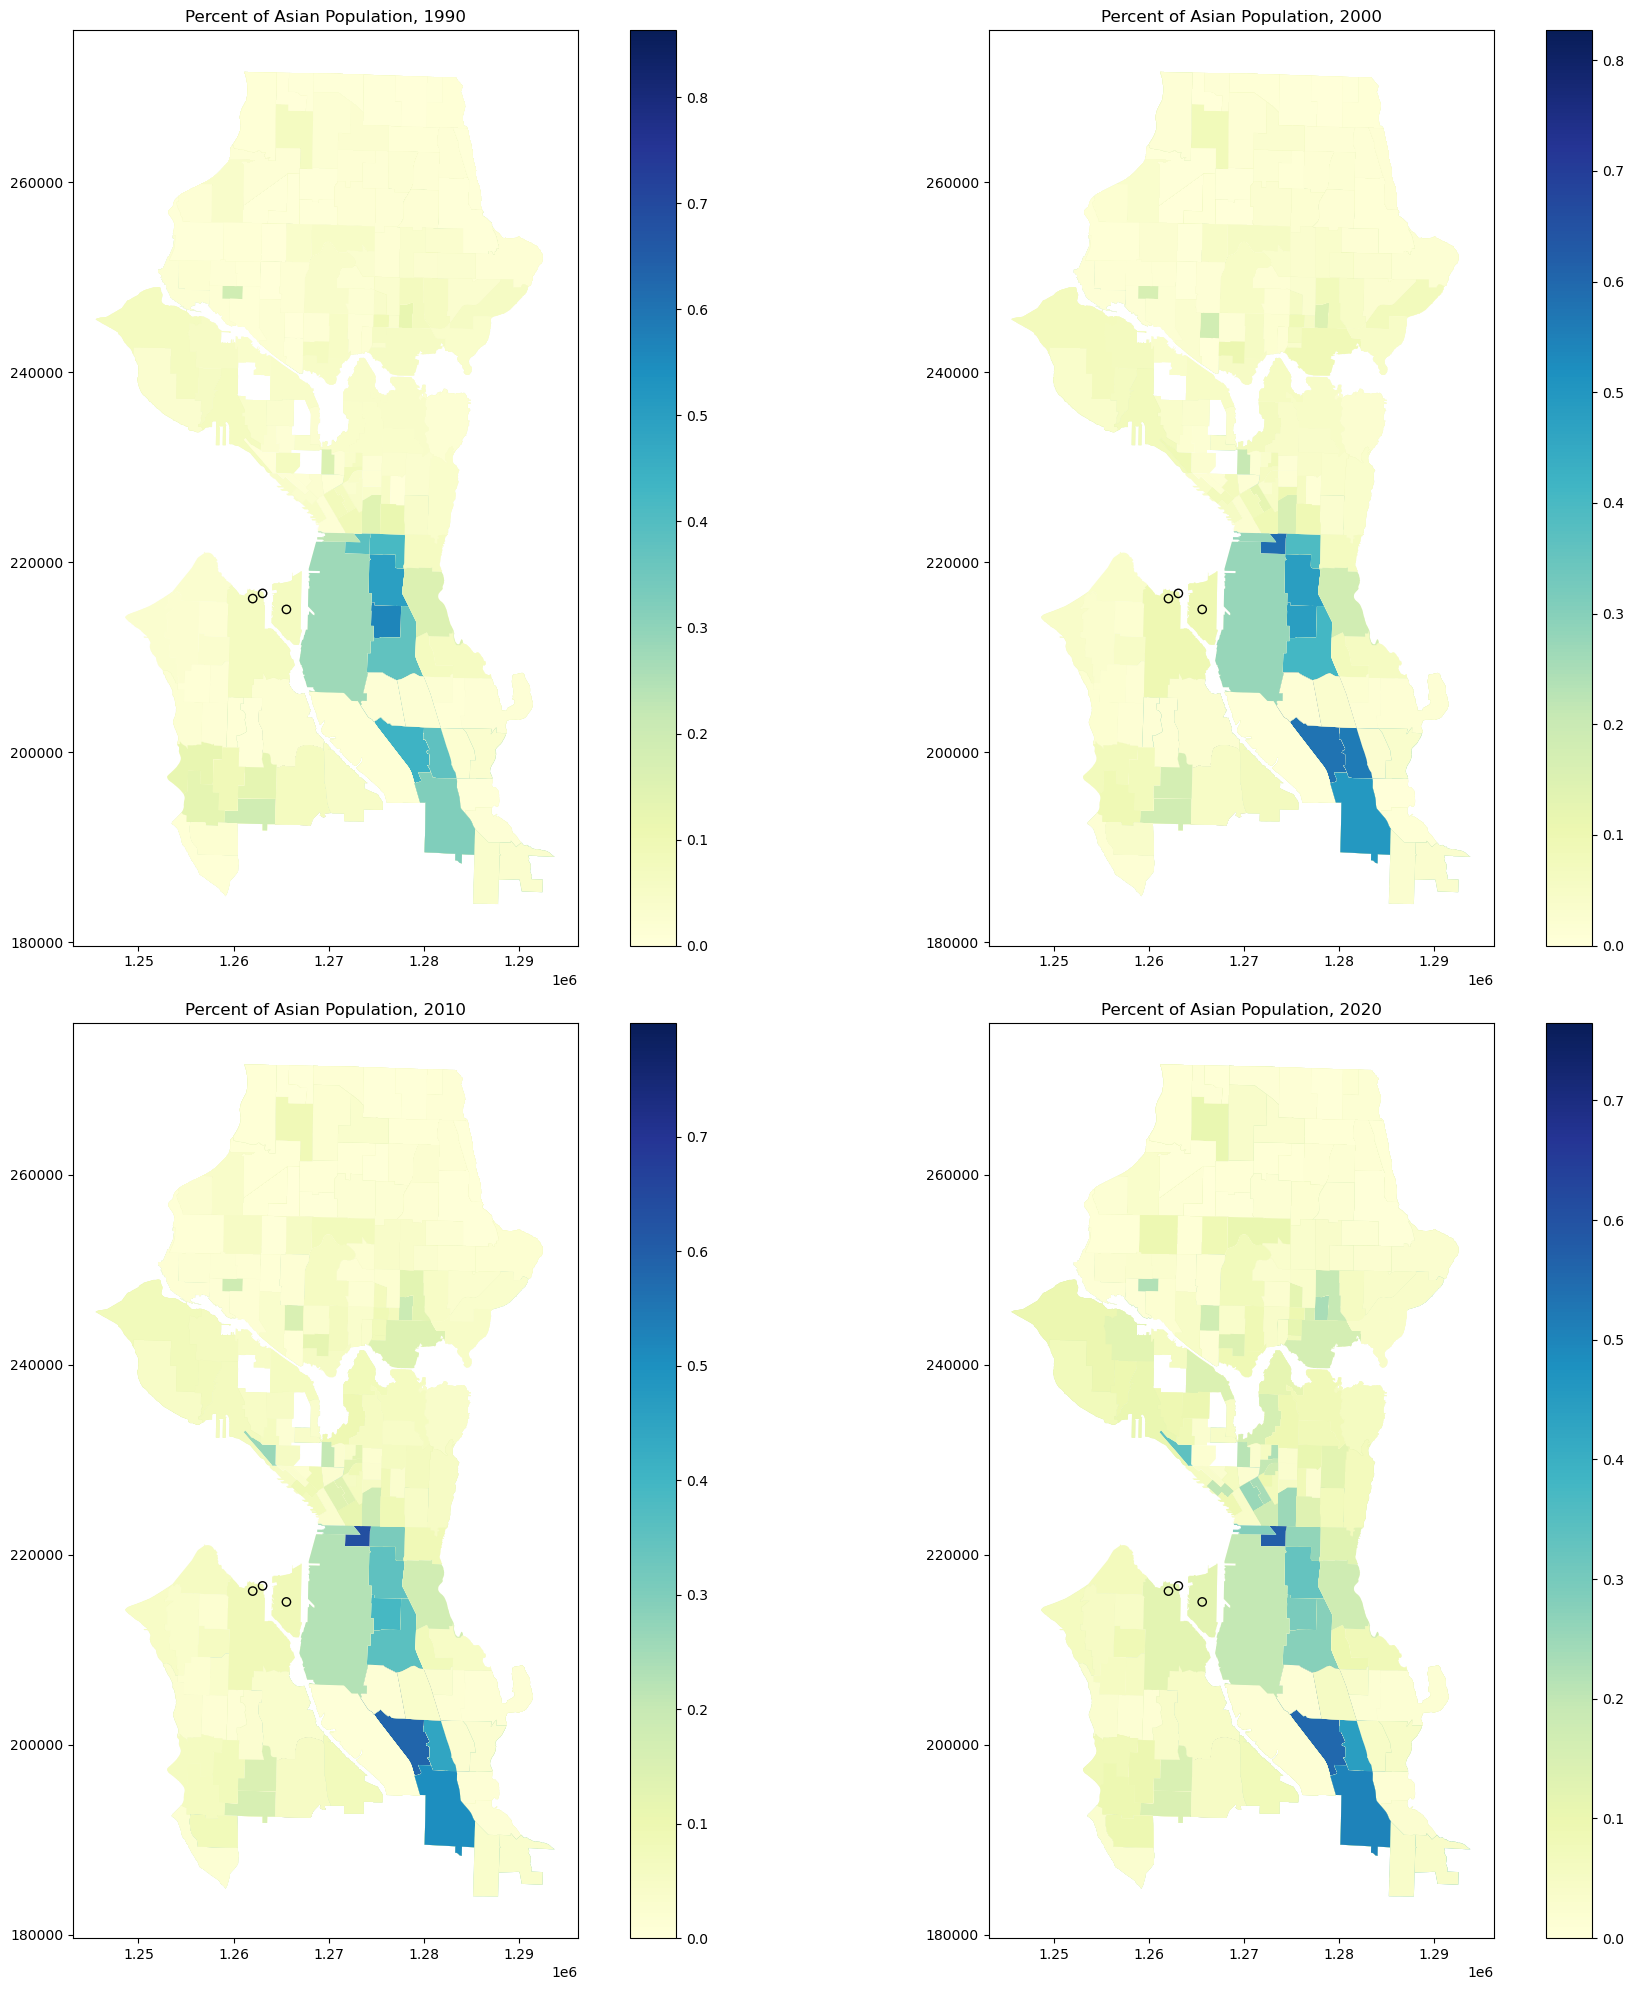

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot perasian1990
sea_race_gdf.plot(column='perasian1990', ax=axs[0, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 0], color='none', edgecolor='black')
axs[0, 0].set_title('Percent of Asian Population, 1990')

# Plot perasian2000
sea_race_gdf.plot(column='perasian2000', ax=axs[0, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 1], color='none', edgecolor='black')
axs[0, 1].set_title('Percent of Asian Population, 2000')

# Plot perasian2010
sea_race_gdf.plot(column='perasian2010', ax=axs[1, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 0], color='none', edgecolor='black')
axs[1, 0].set_title('Percent of Asian Population, 2010')

# Plot perasian2020
sea_race_gdf.plot(column='perasian2020', ax=axs[1, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 1], color='none', edgecolor='black')
axs[1, 1].set_title('Percent of Asian Population, 2020')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/asian_population_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Hispanic and Latino Population 

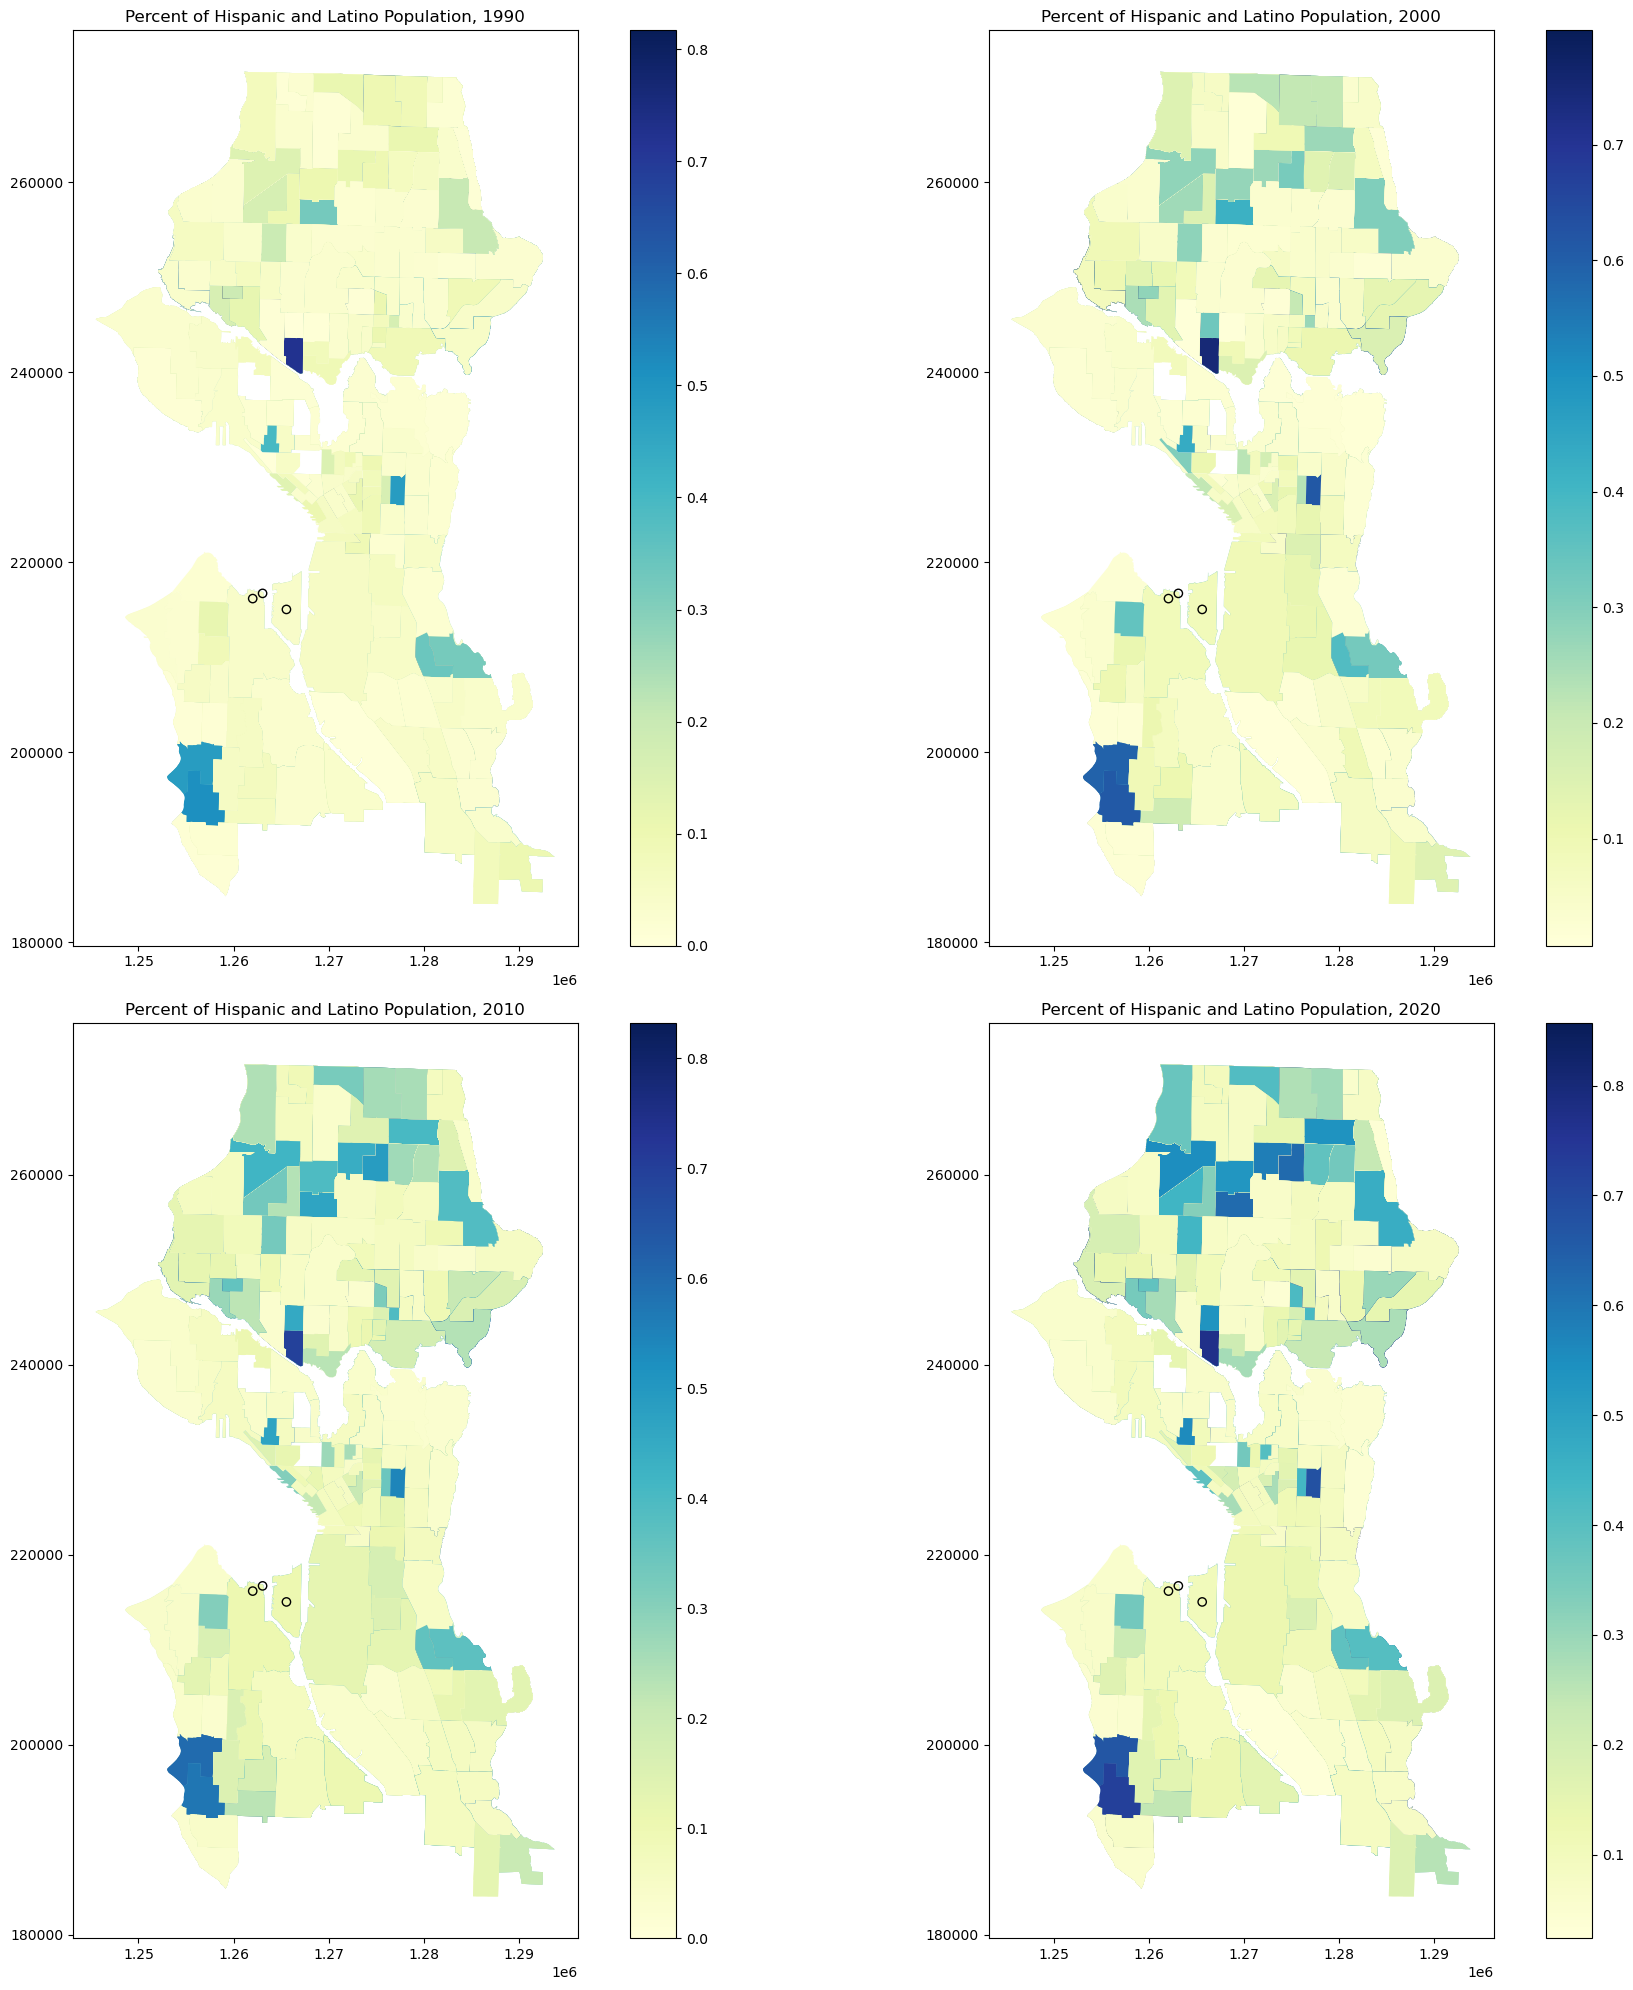

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot perhl1990
sea_race_gdf.plot(column='perhl1990', ax=axs[0, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 0], color='none', edgecolor='black')
axs[0, 0].set_title('Percent of Hispanic and Latino Population, 1990')

# Plot perhl2000
sea_race_gdf.plot(column='perhl2000', ax=axs[0, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 1], color='none', edgecolor='black')
axs[0, 1].set_title('Percent of Hispanic and Latino Population, 2000')

# Plot perhl2010
sea_race_gdf.plot(column='perhl2010', ax=axs[1, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 0], color='none', edgecolor='black')
axs[1, 0].set_title('Percent of Hispanic and Latino Population, 2010')

# Plot perhl2020
sea_race_gdf.plot(column='perhl2020', ax=axs[1, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 1], color='none', edgecolor='black')
axs[1, 1].set_title('Percent of Hispanic and Latino Population, 2020')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/hispanic_latino_population_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### White Population

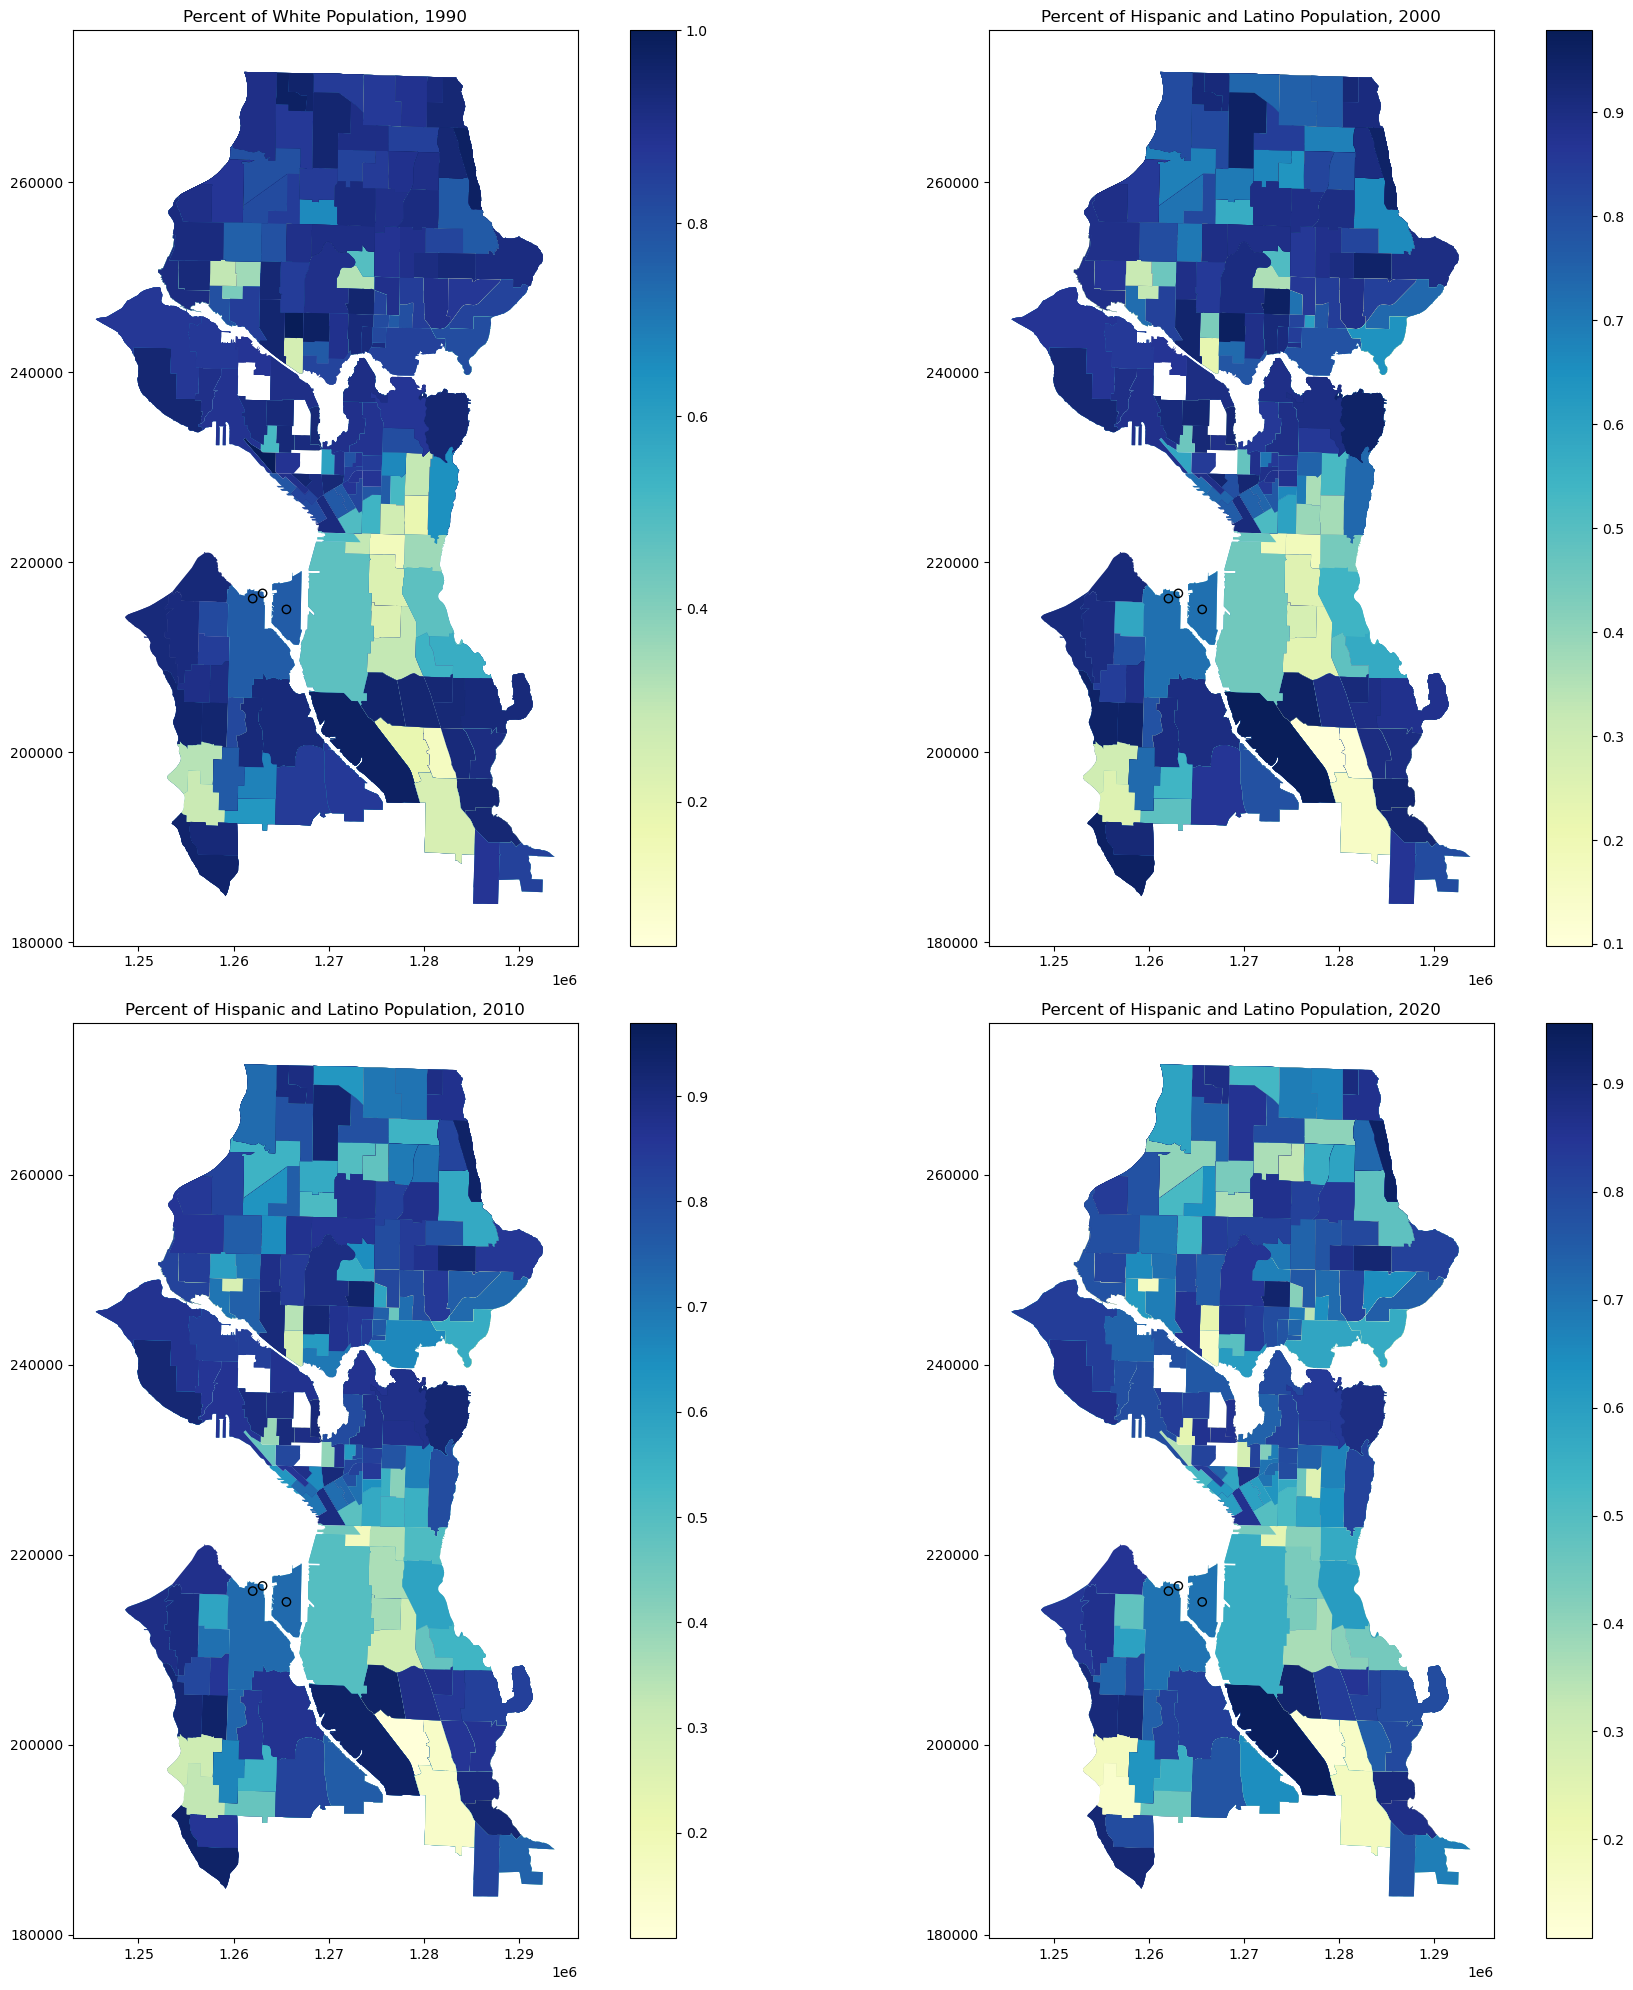

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

sea_race_gdf.plot(column='perwhite1990', ax=axs[0, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 0], color='none', edgecolor='black')
axs[0, 0].set_title('Percent of White Population, 1990')

sea_race_gdf.plot(column='perwhite2000', ax=axs[0, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 1], color='none', edgecolor='black')
axs[0, 1].set_title('Percent of Hispanic and Latino Population, 2000')

sea_race_gdf.plot(column='perwhite2010', ax=axs[1, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 0], color='none', edgecolor='black')
axs[1, 0].set_title('Percent of Hispanic and Latino Population, 2010')

sea_race_gdf.plot(column='perwhite2020', ax=axs[1, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 1], color='none', edgecolor='black')
axs[1, 1].set_title('Percent of Hispanic and Latino Population, 2020')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/white_population_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Income Variables

In [18]:
column_names = ['0_10k1990', '0_10k2000', '0_10k2010', '0_10k2020', '11_14k1990',
       '11_14k2000', '11_14k2010', '11_14k2020', '15_19k1990', '15_19k2000',
       '15_19k2010', '15_19k2020', '20_24k1990', '20_24k2000', 
        '20_24k2010', '20_24k2020', '25_29k1990', '25_29k2000',
        '25_29k2010', '25_29k2020', '30_34k1990',
       '30_34k2000', '30_34k2010', '30_34k2020', '35_39k1990', '35_39k2000',
       '35_39k2010', '35_39k2020', '40_49k1990', '40_49k2000', '40_49k2010',
       '40_49k2020', '50_74k1990', '50_74k2000', '50_74k2010', '50_74k2020',
       '75kover1990', '75kover2000', '75kover2010', '75kover2020']

dtype_dict = {col: np.float64 for col in column_names}

socio_nom = pd.read_csv(socio_nom_fn, dtype=dtype_dict, na_values=[' '])
socio_nom_df = pd.DataFrame(socio_nom)

# Replace NaN values with 0
socio_nom_df = socio_nom_df.fillna(0)

In [19]:
income_df = socio_nom_df
income_df.head()

NHGISCODE     GJOIN1990       GJOIN2000       GJOIN2014  \
0  G0600050000100             0  G0600050000100               0   
1  G0600070000100  G06000700001               0               0   
2  G0600090000100  G06000900001               0               0   
3  G0600110000100  G06001100001  G0600110000100  G0600110000100   
4  G0600150000100  G06001500001               0               0   

        GJOIN2019       GJOIN2022       state  statefip            county  \
0               0               0  California         6     Amador County   
1               0               0  California         6      Butte County   
2               0               0  California         6  Calaveras County   
3  G0600110000100  G0600110000100  California         6     Colusa County   
4               0               0  California         6  Del Norte County   

   countyfip  ...  40_49k2010  40_49k2020  50_74k1990  50_74k2000  50_74k2010  \
0          5  ...         0.0         0.0         0.0       528.0         0.0   
1          7  ...         0.0         0.0       420.0         0.0         0.0   
2          9  ...         0.0         0.0       433.0         0.0         0.0   
3         11  ...       278.0       123.0       142.0       238.0       637.0   
4         15  ...         0.0         0.0       472.0         0.0         0.0   

   50_74k2020  75kover1990  75kover2000  75kover2010  75kover2020  
0         0.0          0.0        476.0          0.0          0.0  
1         0.0        159.0          0.0          0.0          0.0  
2         0.0        174.0          0.0          0.0          0.0  
3       304.0         89.0        223.0       1171.0        832.0  
4         0.0        187.0          0.0          0.0          0.0  

[5 rows x 51 columns]

In [20]:
# List of columns to consolidate
cols_to_consolidate = ['0_10k', '11_14k', '15_19k', '20_24k']

# Create the 'under25k' column by summing the specified columns for each decade
for year in years:
    income_df[f'under25k{year}'] = income_df[[f'{col}{year}' for col in cols_to_consolidate]].sum(axis=1)

# Drop the consolidated columns
income_df = income_df.drop(columns=[f'{col}{year}' for col in cols_to_consolidate for year in years])

In [21]:
# List of columns to consolidate
cols_to_consolidate = ['25_29k', '30_34k', '35_39k']

# Create the '25_39k' column by summing the specified columns
for year in years:
    income_df[f'25_39k{year}'] = income_df[[f'{col}{year}' for col in cols_to_consolidate]].sum(axis=1)

# Drop the consolidated columns
income_df = income_df.drop(columns=[f'{col}{year}' for col in cols_to_consolidate for year in years])

In [22]:
income_df.columns

Index(['NHGISCODE', 'GJOIN1990', 'GJOIN2000', 'GJOIN2014', 'GJOIN2019',
       'GJOIN2022', 'state', 'statefip', 'county', 'countyfip', 'tracts',
       '40_49k1990', '40_49k2000', '40_49k2010', '40_49k2020', '50_74k1990',
       '50_74k2000', '50_74k2010', '50_74k2020', '75kover1990', '75kover2000',
       '75kover2010', '75kover2020', 'under25k1990', 'under25k2000',
       'under25k2010', 'under25k2020', '25_39k1990', '25_39k2000',
       '25_39k2010', '25_39k2020'],
      dtype='object')

In [23]:
#Creating percentages of each income bracket
# List of income brackets
income_brackets = ['under25k', '25_39k', '40_49k', '50_74k', '75kover']

# List of years
years = ['1990', '2000', '2010', '2020']

# Calculate the percentage for each income bracket and each year
for year in years:
    total_income = income_df[[f'{bracket}{year}' for bracket in income_brackets]].sum(axis=1)
    for bracket in income_brackets:
        income_df[f'per{bracket}{year}'] = income_df[f'{bracket}{year}'] / total_income

# List of geographical columns to keep
geo_cols = ['state', 'statefip', 'county', 'countyfip', 'tracts']

# Create a DataFrame with the geo and percentage columns
per_income_df = income_df[geo_cols + [f'per{bracket}{year}' for bracket in income_brackets for year in years]]
per_income_df

state  statefip            county  countyfip  tracts  \
0      California         6     Amador County          5     100   
1      California         6      Butte County          7     100   
2      California         6  Calaveras County          9     100   
3      California         6     Colusa County         11     100   
4      California         6  Del Norte County         15     100   
...           ...       ...               ...        ...     ...   
16774  Washington        53   San Juan County         55  990100   
16775  Washington        53     Skagit County         57  990100   
16776  Washington        53  Snohomish County         61  990100   
16777  Washington        53   Thurston County         67  990100   
16778  Washington        53     Island County         29  992201   

       perunder25k1990  perunder25k2000  perunder25k2010  perunder25k2020  \
0                  NaN         0.272249              NaN              NaN   
1             0.373099              NaN              NaN              NaN   
2             0.473025              NaN              NaN              NaN   
3             0.511058         0.326168         0.172956         0.089781   
4             0.561842              NaN              NaN              NaN   
...                ...              ...              ...              ...   
16774              NaN              NaN              NaN              NaN   
16775              NaN              NaN         1.000000              NaN   
16776              NaN              NaN              NaN              NaN   
16777              NaN              NaN              NaN              NaN   
16778              NaN              NaN              NaN              NaN   

       per25_39k1990  ...  per40_49k2010  per40_49k2020  per50_74k1990  \
0                NaN  ...            NaN            NaN            NaN   
1           0.303819  ...            NaN            NaN       0.141940   
2           0.238152  ...            NaN            NaN       0.129061   
3           0.218009  ...       0.087421       0.072652       0.112164   
4           0.221615  ...            NaN            NaN       0.092080   
...              ...  ...            ...            ...            ...   
16774            NaN  ...            NaN            NaN            NaN   
16775            NaN  ...       0.000000            NaN            NaN   
16776            NaN  ...            NaN            NaN            NaN   
16777            NaN  ...            NaN            NaN            NaN   
16778            NaN  ...            NaN            NaN            NaN   

       per50_74k2000  per50_74k2010  per50_74k2020  per75kover1990  \
0           0.198273            NaN            NaN             NaN   
1                NaN            NaN            NaN        0.053734   
2                NaN            NaN            NaN        0.051863   
3           0.176427       0.200314       0.179563        0.070300   
4                NaN            NaN            NaN        0.036481   
...              ...            ...            ...             ...   
16774            NaN            NaN            NaN             NaN   
16775            NaN       0.000000            NaN             NaN   
16776            NaN            NaN            NaN             NaN   
16777            NaN            NaN            NaN             NaN   
16778            NaN            NaN            NaN             NaN   

       per75kover2000  per75kover2010  per75kover2020  
0            0.178746             NaN             NaN  
1                 NaN             NaN             NaN  
2                 NaN             NaN             NaN  
3            0.165308        0.368239        0.491435  
4                 NaN             NaN             NaN  
...               ...             ...             ...  
16774             NaN             NaN             NaN  
16775             NaN        0.000000             NaN  
16776             NaN             Na

In [24]:
sea_income_gdf = seattle_gdf.merge(per_income_df, on="tracts", how="left")
sea_income_gdf

OBJECTID      GEOID20  GROSS_ACRES  LAND_ACRES  WATER_ACRES  \
0            1  53033000402   444.493643  444.527261          0.0   
1            1  53033000402   444.493643  444.527261          0.0   
2            1  53033000402   444.493643  444.527261          0.0   
3            1  53033000402   444.493643  444.527261          0.0   
4            1  53033000402   444.493643  444.527261          0.0   
...        ...          ...          ...         ...          ...   
1650       371  53033011901   415.718564  415.723669          0.0   
1651       371  53033011901   415.718564  415.723669          0.0   
1652       371  53033011901   415.718564  415.723669          0.0   
1653       371  53033011901   415.718564  415.723669          0.0   
1654       371  53033011901   415.718564  415.723669          0.0   

                     NAME  tracts BASENAME            UVDA_AREA  CRA_NO  ...  \
0       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
1       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
2       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
3       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
4       Census Tract 4.02     402     4.02  Bitter Lake Village     9.1  ...   
...                   ...     ...      ...                  ...     ...  ...   
1650  Census Tract 119.01   11901   119.01  Outside - Southeast     4.1  ...   
1651  Census Tract 119.01   11901   119.01  Outside - Southeast     4.1  ...   
1652  Census Tract 119.01   11901   119.01  Outside - Southeast     4.1  ...   
1653  Census Tract 119.01   11901   119.01  Outside - Southeast     4.1  ...   
1654  Census Tract 119.01   11901   119.01  Outside - Southeast     4.1  ...   

      per40_49k2010 per40_49k2020 per50_74k1990  per50_74k2000 per50_74k2010  \
0          0.080042      0.130785           NaN       0.229824      0.138773   
1          0.067898           NaN           NaN            NaN      0.206856   
2          0.073230      0.057385      0.224236       0.167097      0.192026   
3               NaN      0.137178           NaN            NaN           NaN   
4          0.081891           NaN           NaN            NaN      0.172611   
...             ...           ...           ...            ...           ...   
1650            NaN           NaN           NaN       0.124402           NaN   
1651       0.054197      0.032382           NaN            NaN      0.153007   
1652       0.086809      0.017981           NaN       0.172138      0.131154   
1653            NaN      0.055107           NaN            NaN           NaN   
1654            NaN      0.030402           NaN            NaN           NaN   

     per50_74k2020  per75kover1990 per75kover2000  per75kover2010  \
0         0.133803             NaN       0.230893        0.432952   
1              NaN             NaN            NaN        0.504743   
2         0.138224        0.134768       0.338501        0.535937   
3         0.183944             NaN            NaN             NaN   
4              NaN             NaN            NaN        0.408068   
...            ...             ...            ...             ...   
1650           NaN             NaN       0.062201             NaN   
1651      0.101002             NaN            NaN        0.525446   
1652      0.138313             NaN       0.257806        0.421270   
1653      0.096988             NaN            NaN             NaN   
1654      0.339848             NaN            NaN             NaN   

      per75kover2020  
0           0.437123  
1                NaN  
2           0.681637  
3           0.268901  
4                NaN  
...              ...  
1650             NaN  
1651        0.669237  
1652        0.638313  
1653        0.786921  
1654        0.521173  

[1655 rows x 39 columns]

In [25]:
sea_income_gdf.columns

Index(['OBJECTID', 'GEOID20', 'GROSS_ACRES', 'LAND_ACRES', 'WATER_ACRES',
       'NAME', 'tracts', 'BASENAME', 'UVDA_AREA', 'CRA_NO', 'CRA_GRP',
       'GEN_ALIAS', 'DETL_NAMES', 'C_DISTRICT', 'geometry', 'state',
       'statefip', 'county', 'countyfip', 'perunder25k1990', 'perunder25k2000',
       'perunder25k2010', 'perunder25k2020', 'per25_39k1990', 'per25_39k2000',
       'per25_39k2010', 'per25_39k2020', 'per40_49k1990', 'per40_49k2000',
       'per40_49k2010', 'per40_49k2020', 'per50_74k1990', 'per50_74k2000',
       'per50_74k2010', 'per50_74k2020', 'per75kover1990', 'per75kover2000',
       'per75kover2010', 'per75kover2020'],
      dtype='object')

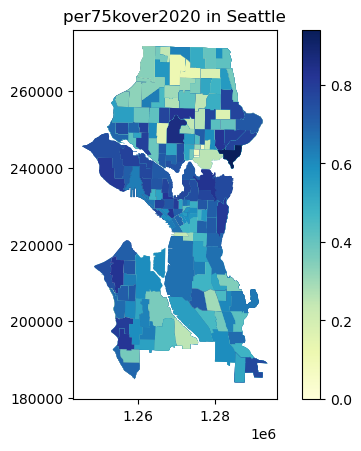

In [26]:
#Testing outcome
fig, ax = plt.subplots(1, 1)
sea_income_gdf.plot(column='per75kover2020', ax=ax, legend=True, cmap='YlGnBu')
plt.title('per75kover2020 in Seattle')
plt.show()

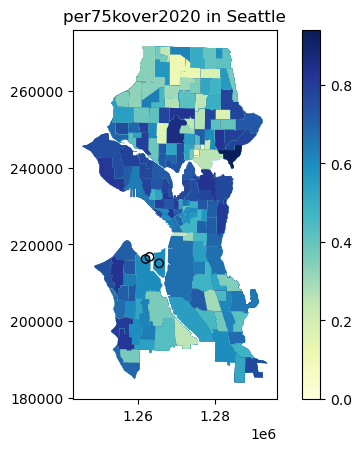

In [27]:
# Adding fixed effects 
fixed_gdf_aea = fixed_gdf_aea.to_crs(sea_race_gdf.crs)

fixed_gdf_aea_clipped = gpd.clip(fixed_gdf_aea, sea_race_gdf)

fig, ax = plt.subplots(1, 1)

sea_income_gdf.plot(column='per75kover2020', ax=ax, legend=True, cmap='YlGnBu')

fixed_gdf_aea_clipped.plot(ax=ax, color='none', edgecolor='black')

plt.title('per75kover2020 in Seattle')
plt.show()

#### Income Bracket: Over $75K

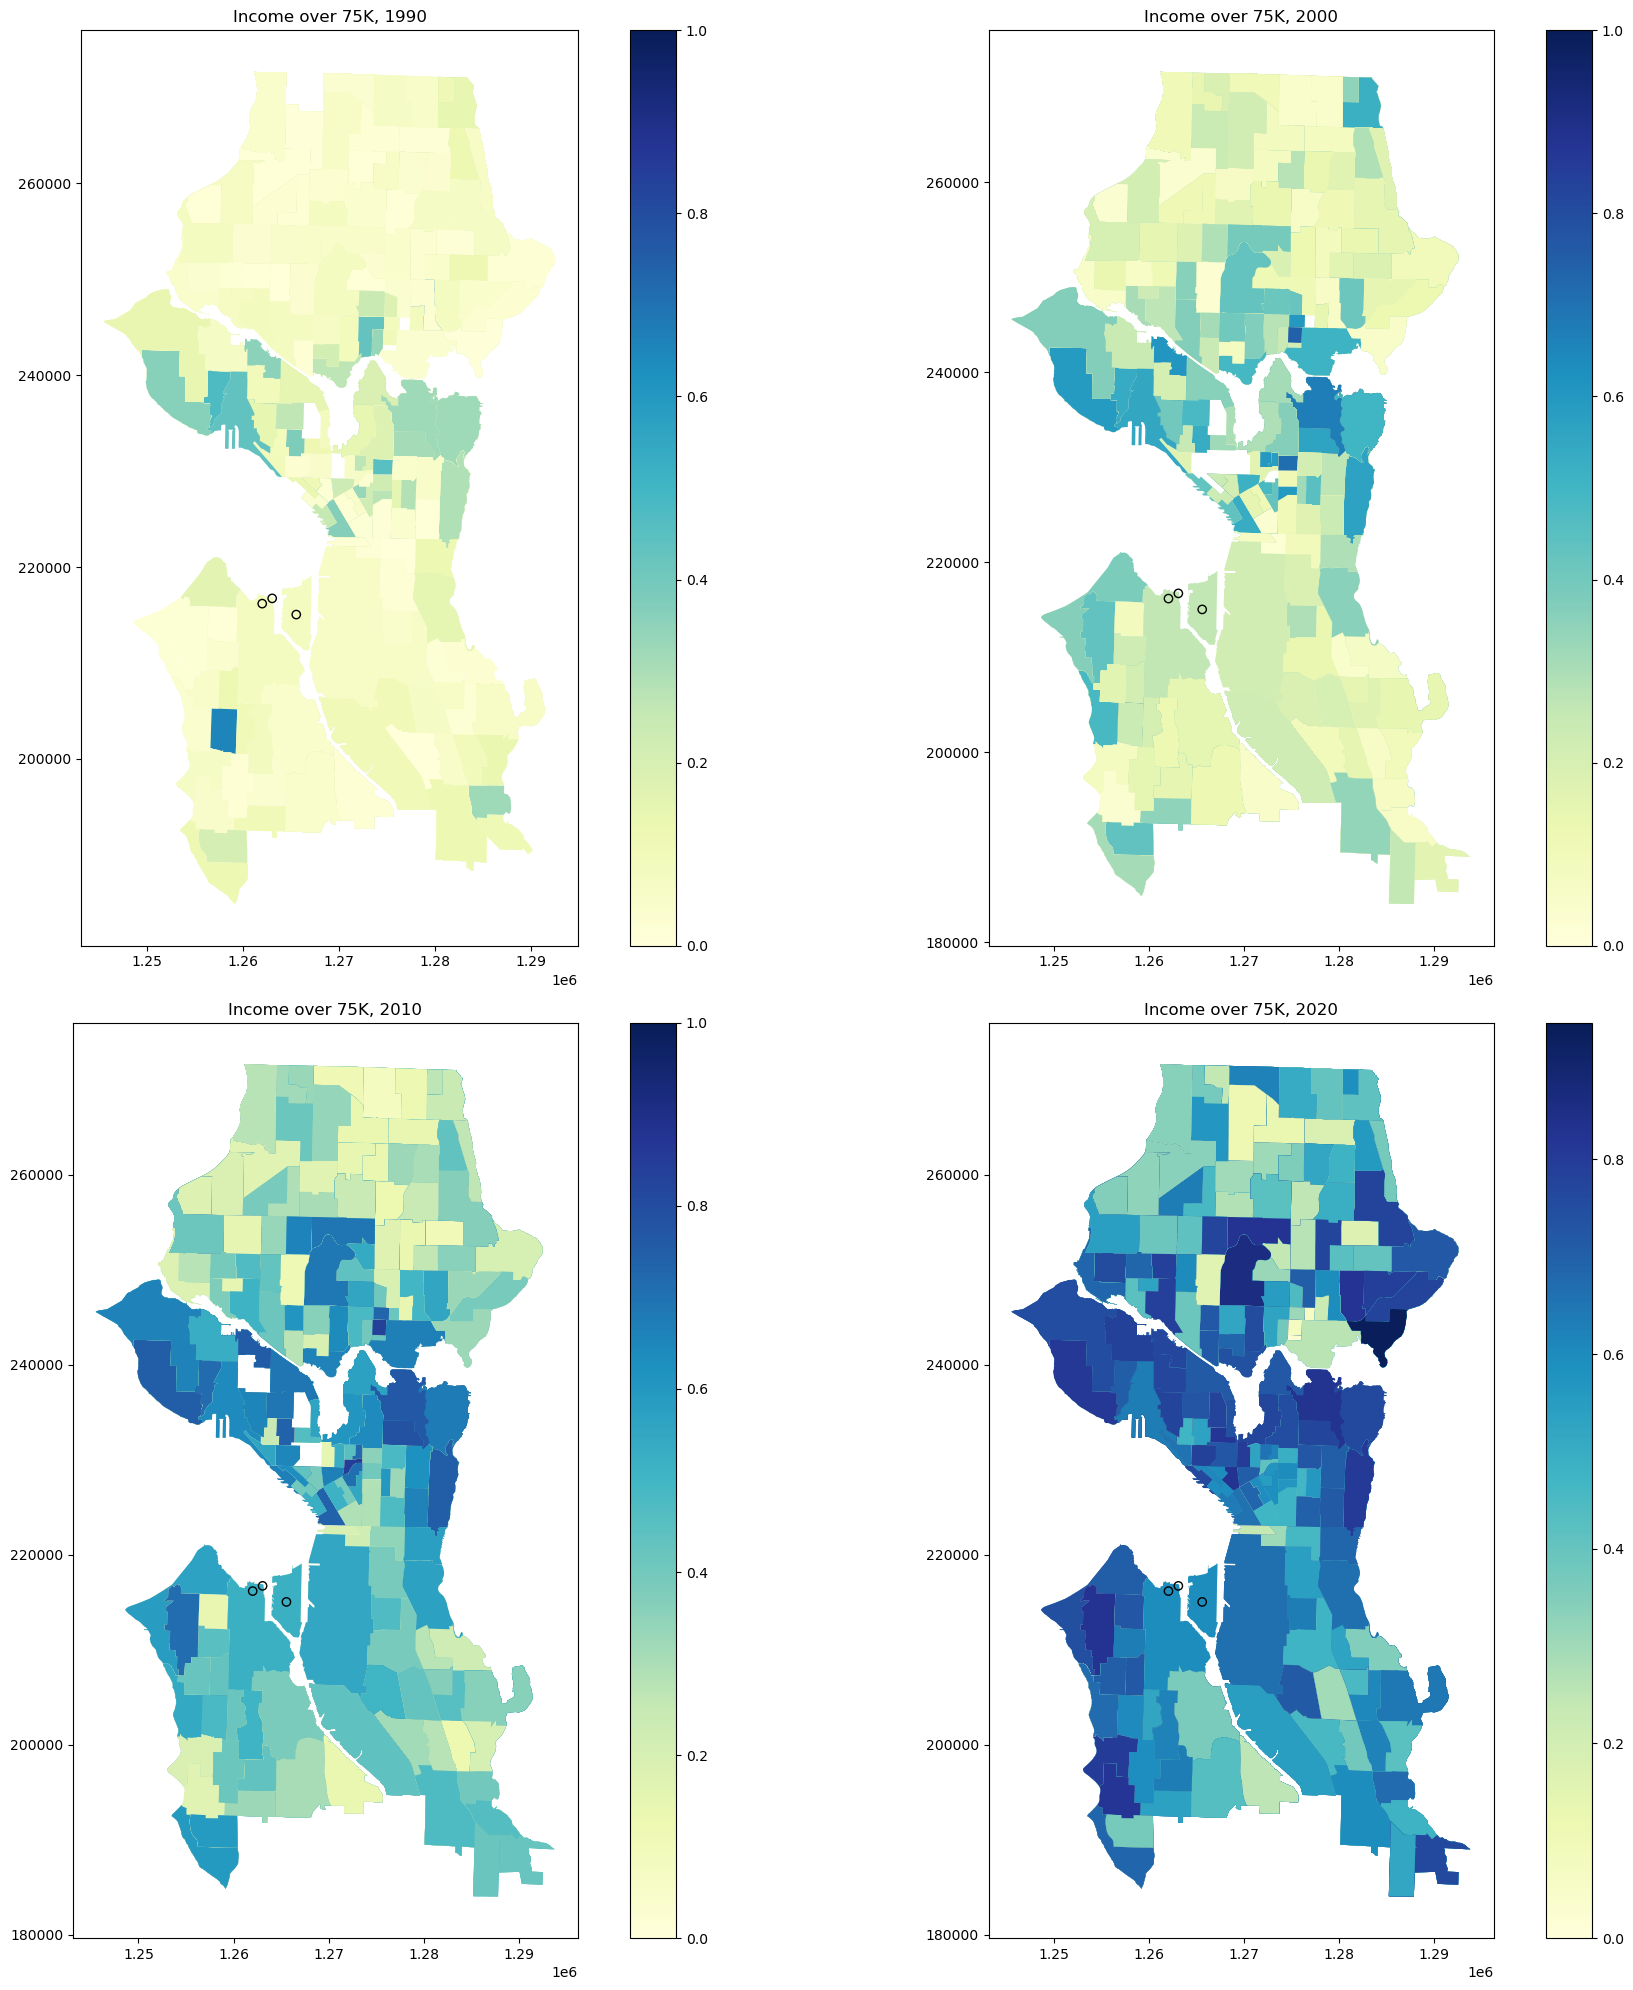

In [29]:
# Adding fixed effects 
fixed_gdf_aea = fixed_gdf_aea.to_crs(sea_income_gdf.crs)
fixed_gdf_aea_clipped = gpd.clip(fixed_gdf_aea, sea_income_gdf)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot per75kover1990
sea_income_gdf.plot(column='per75kover1990', ax=axs[0, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 0], color='none', edgecolor='black')
axs[0, 0].set_title('Income over 75K, 1990')

# Plot per75kover2000
sea_income_gdf.plot(column='per75kover2000', ax=axs[0, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 1], color='none', edgecolor='black')
axs[0, 1].set_title('Income over 75K, 2000')

# Plot per75kover2010
sea_income_gdf.plot(column='per75kover2010', ax=axs[1, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 0], color='none', edgecolor='black')
axs[1, 0].set_title('Income over 75K, 2010')

# Plot per75kover2020
sea_income_gdf.plot(column='per75kover2020', ax=axs[1, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 1], color='none', edgecolor='black')
axs[1, 1].set_title('Income over 75K, 2020')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/75kincome_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Income Bracket: Between 50,000 and 75,000

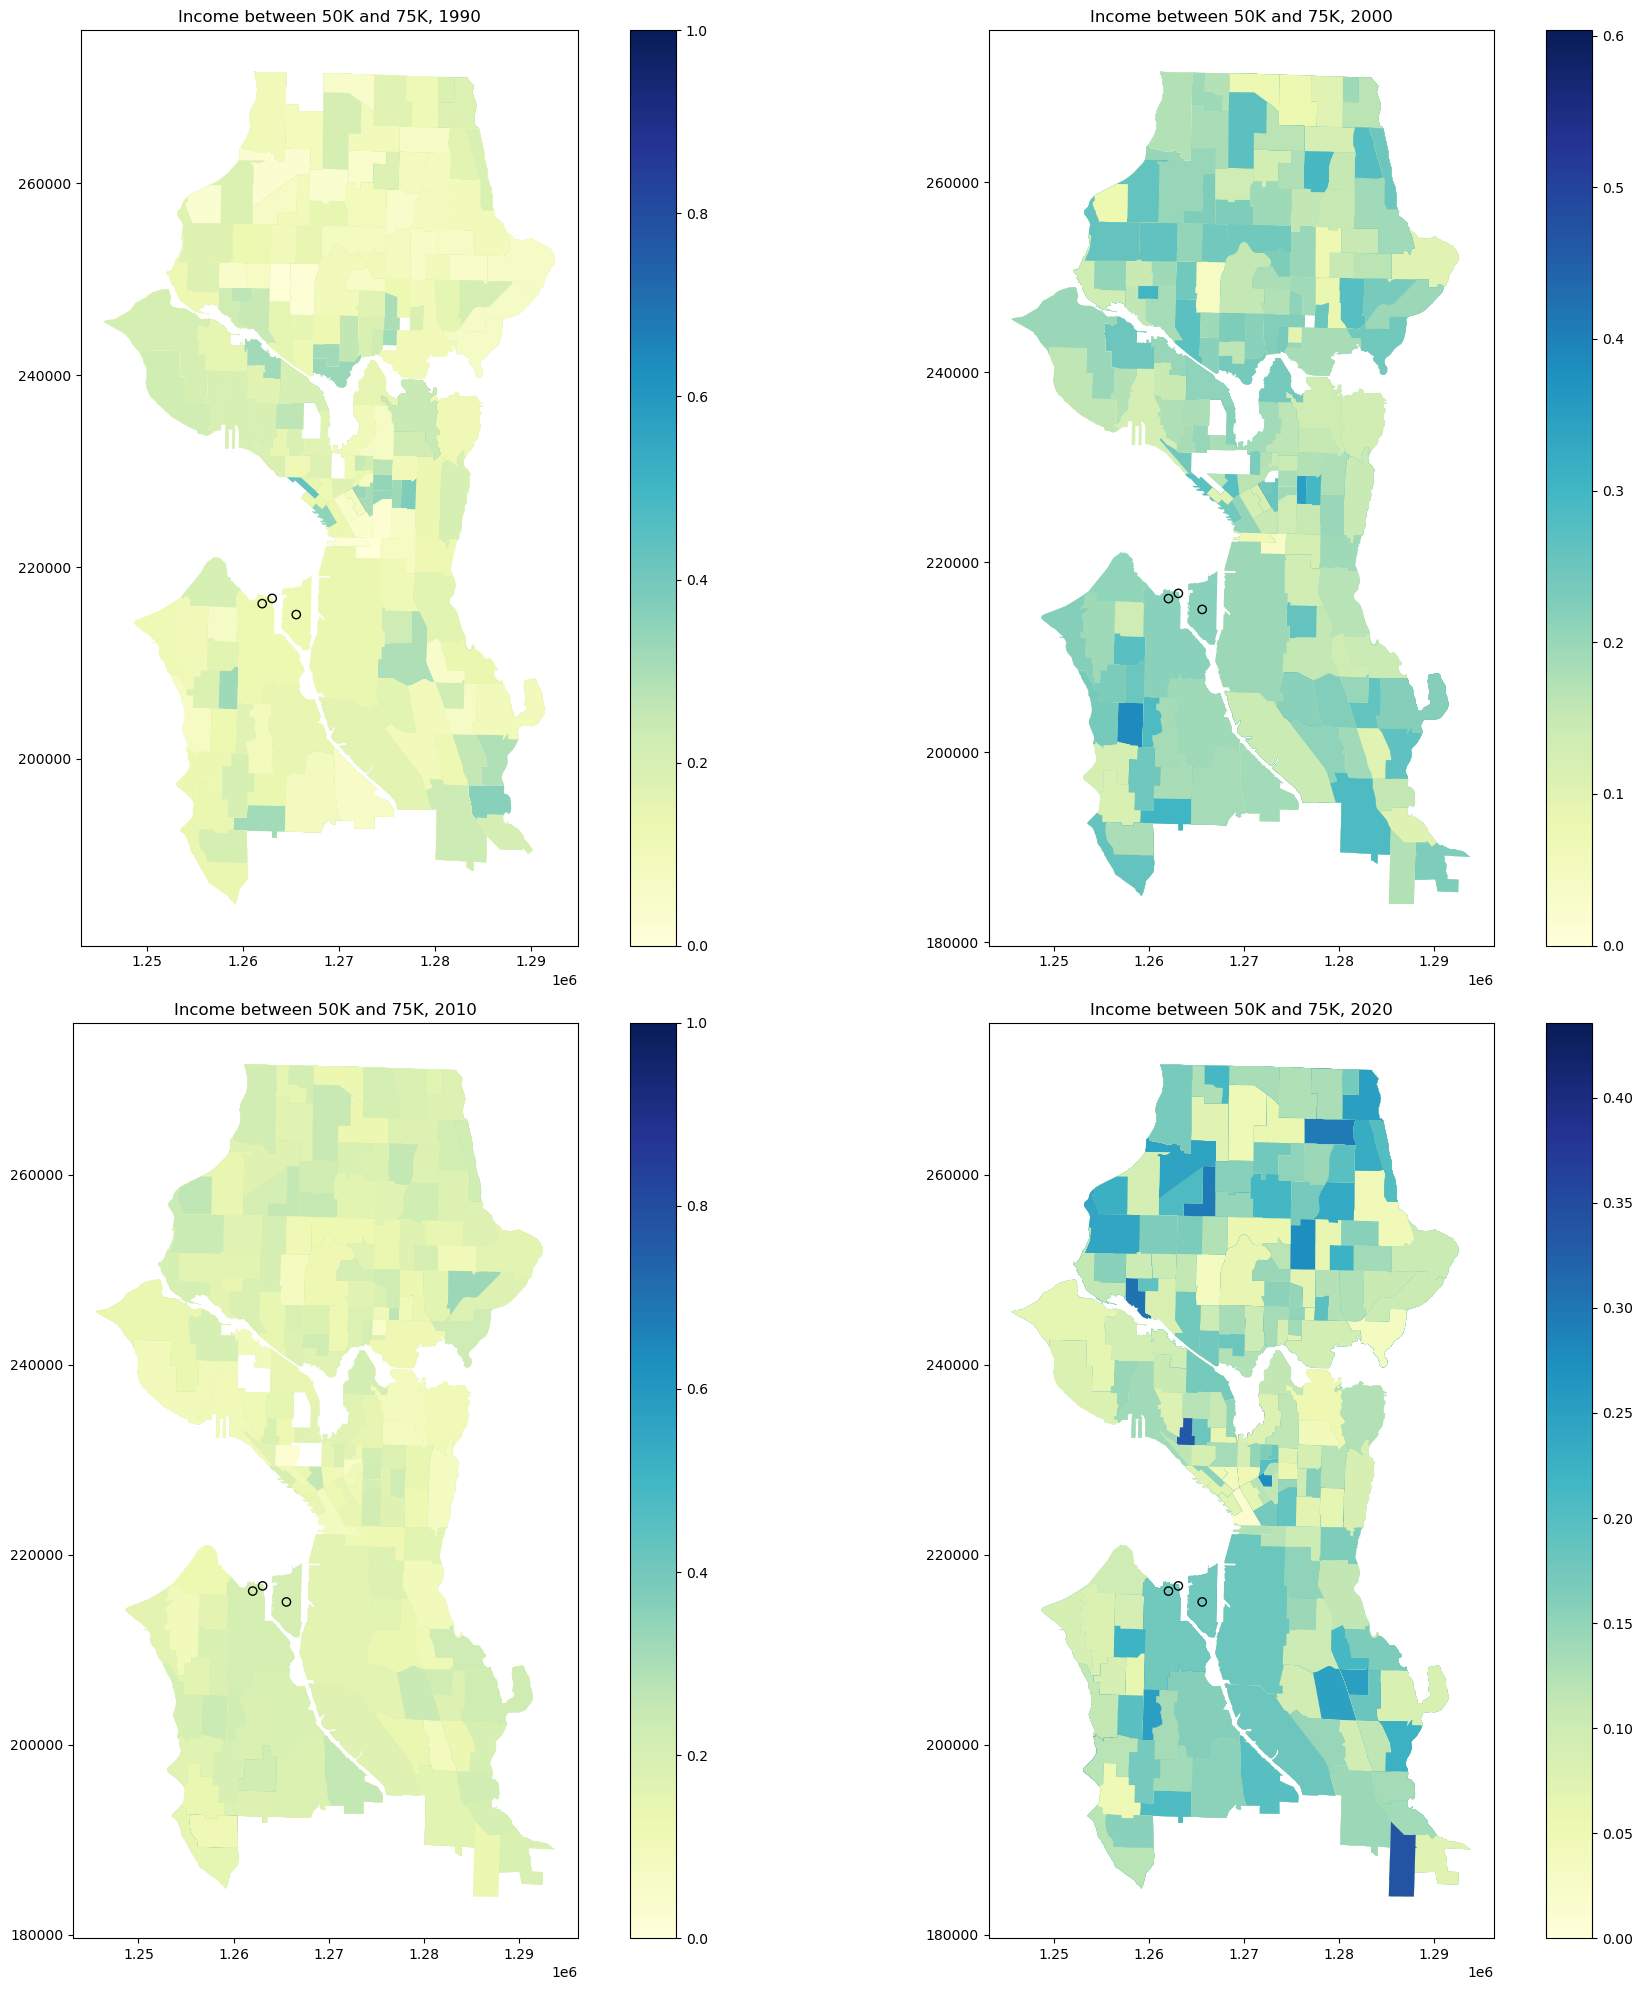

In [30]:
# Adding fixed effects 
fixed_gdf_aea = fixed_gdf_aea.to_crs(sea_income_gdf.crs)
fixed_gdf_aea_clipped = gpd.clip(fixed_gdf_aea, sea_income_gdf)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot per50_74k1990
sea_income_gdf.plot(column='per50_74k1990', ax=axs[0, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 0], color='none', edgecolor='black')
axs[0, 0].set_title('Income between 50K and 75K, 1990')

# Plot per50_74k2000
sea_income_gdf.plot(column='per50_74k2000', ax=axs[0, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 1], color='none', edgecolor='black')
axs[0, 1].set_title('Income between 50K and 75K, 2000')

# Plot per50_74k2010
sea_income_gdf.plot(column='per50_74k2010', ax=axs[1, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 0], color='none', edgecolor='black')
axs[1, 0].set_title('Income between 50K and 75K, 2010')

# Plot per50_74k2020
sea_income_gdf.plot(column='per50_74k2020', ax=axs[1, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 1], color='none', edgecolor='black')
axs[1, 1].set_title('Income between 50K and 75K, 2020')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/50-75kincome_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Income Bracket: Between 40,000 and 50,000

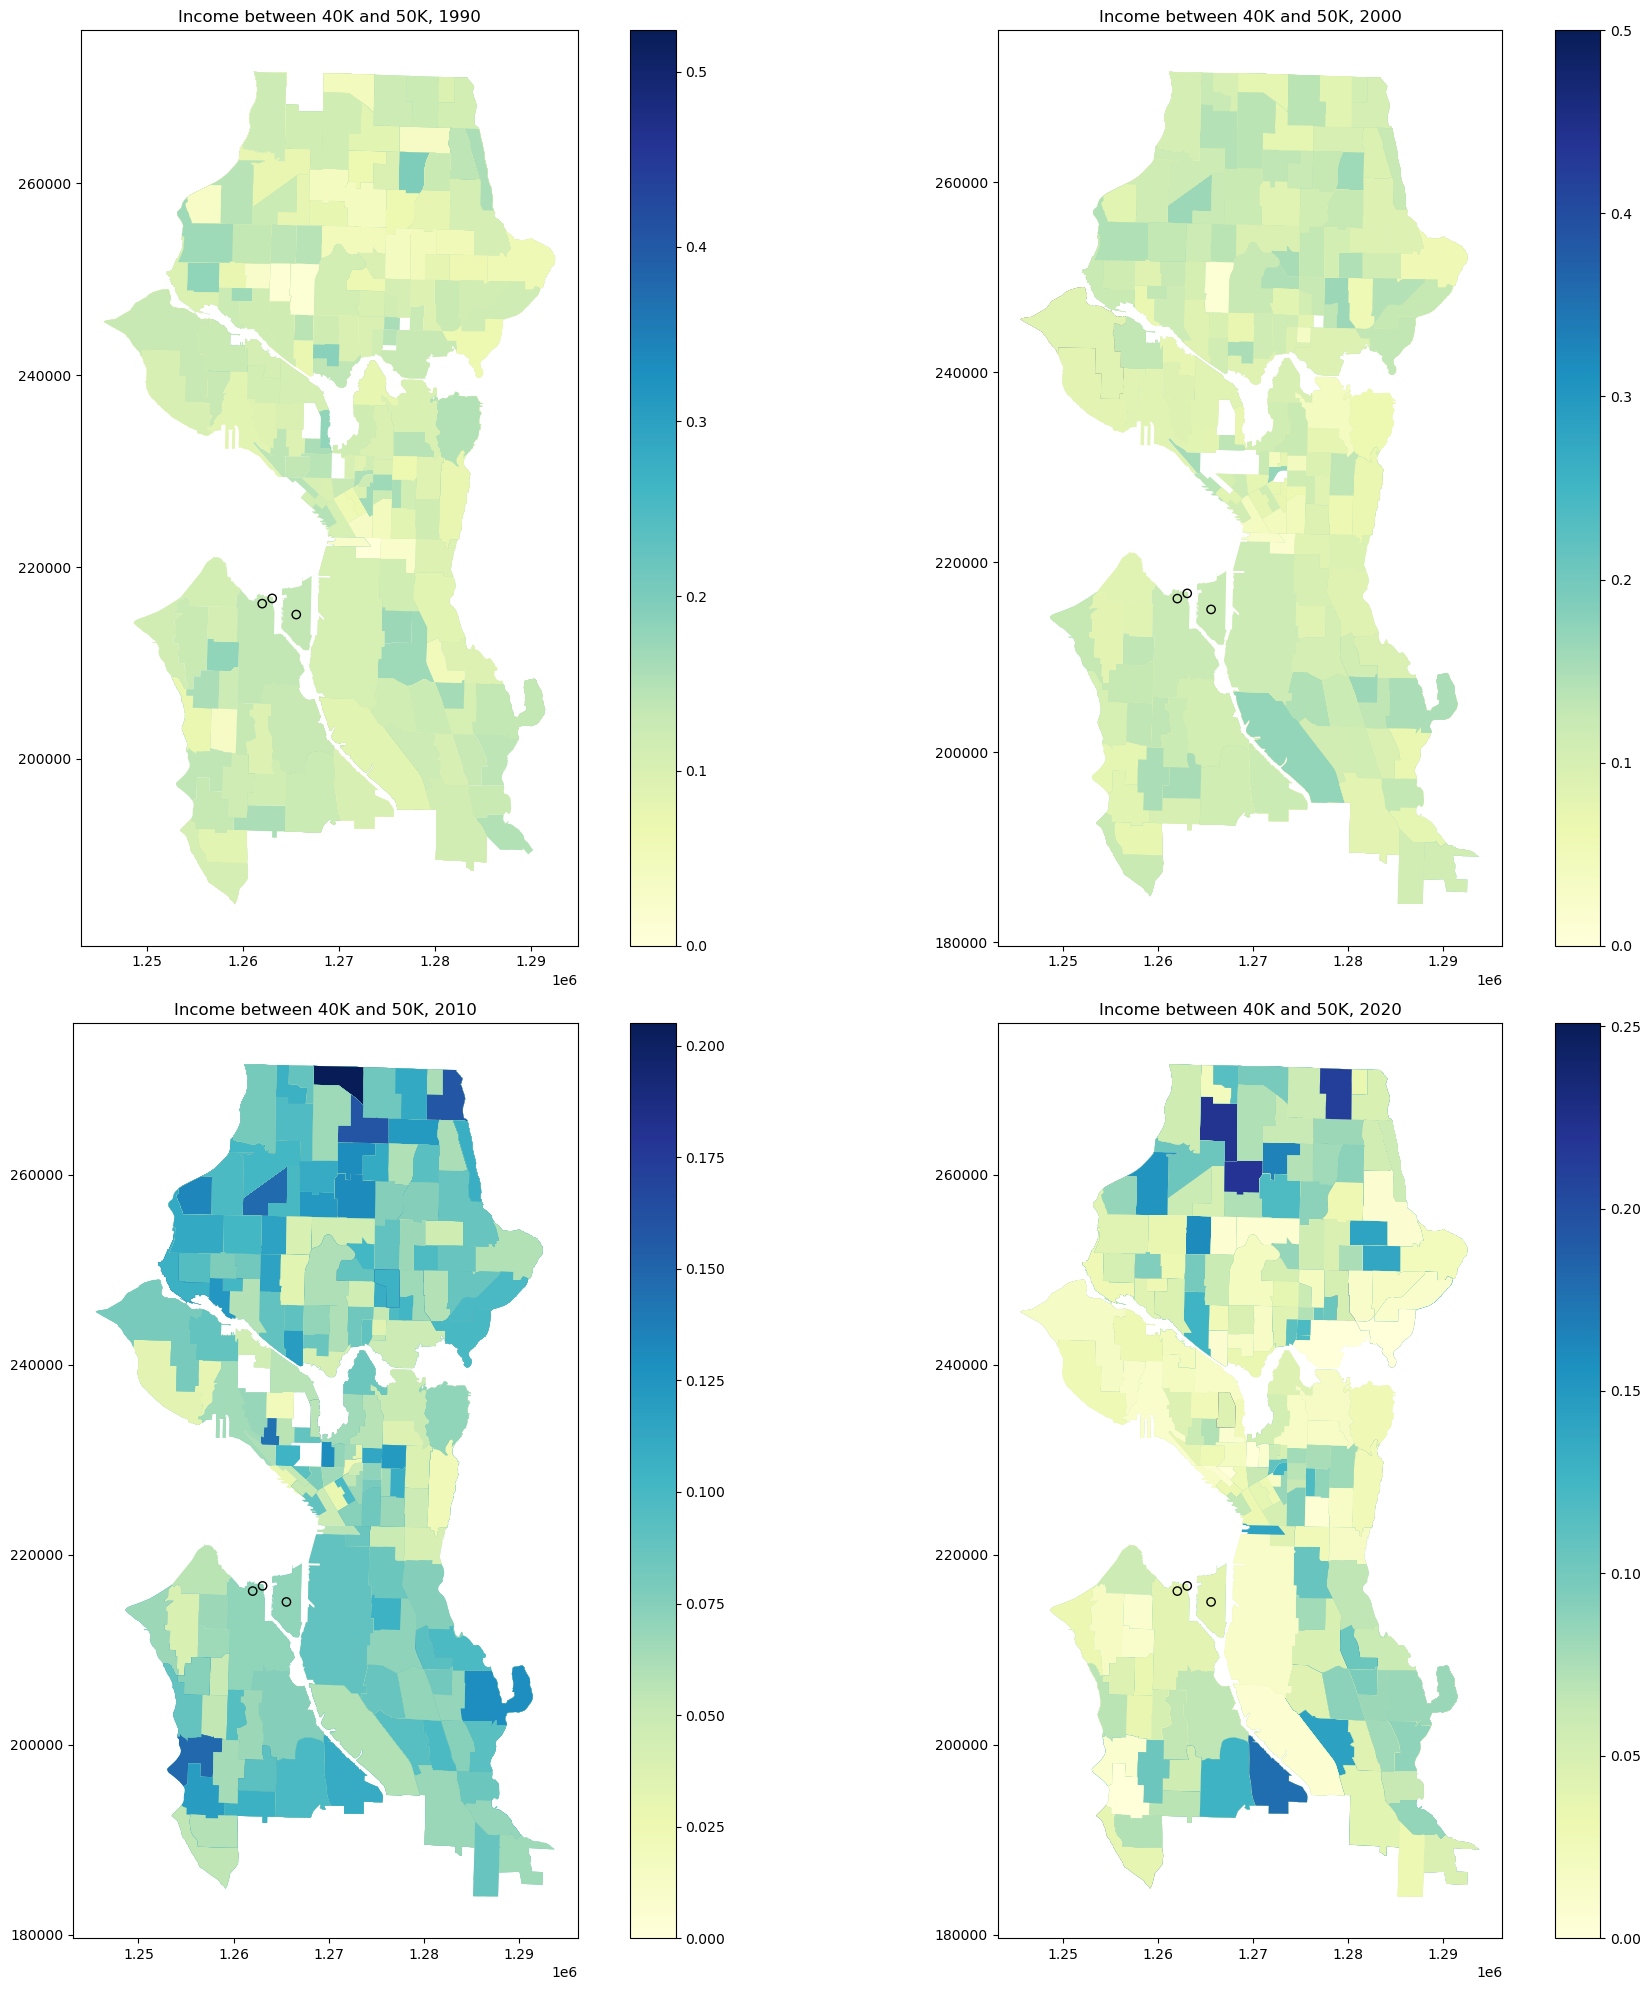

In [32]:
# Adding fixed effects 
fixed_gdf_aea = fixed_gdf_aea.to_crs(sea_income_gdf.crs)
fixed_gdf_aea_clipped = gpd.clip(fixed_gdf_aea, sea_income_gdf)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot per40_49k1990
sea_income_gdf.plot(column='per40_49k1990', ax=axs[0, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 0], color='none', edgecolor='black')
axs[0, 0].set_title('Income between 40K and 50K, 1990')

# Plot per40_49k2000
sea_income_gdf.plot(column='per40_49k2000', ax=axs[0, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 1], color='none', edgecolor='black')
axs[0, 1].set_title('Income between 40K and 50K, 2000')

# Plot per40_49k2010
sea_income_gdf.plot(column='per40_49k2010', ax=axs[1, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 0], color='none', edgecolor='black')
axs[1, 0].set_title('Income between 40K and 50K, 2010')

# Plot per40_49k2020
sea_income_gdf.plot(column='per40_49k2020', ax=axs[1, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 1], color='none', edgecolor='black')
axs[1, 1].set_title('Income between 40K and 50K, 2020')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/40-50kincome_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Income Bracket: Between 25,000 and 40,000

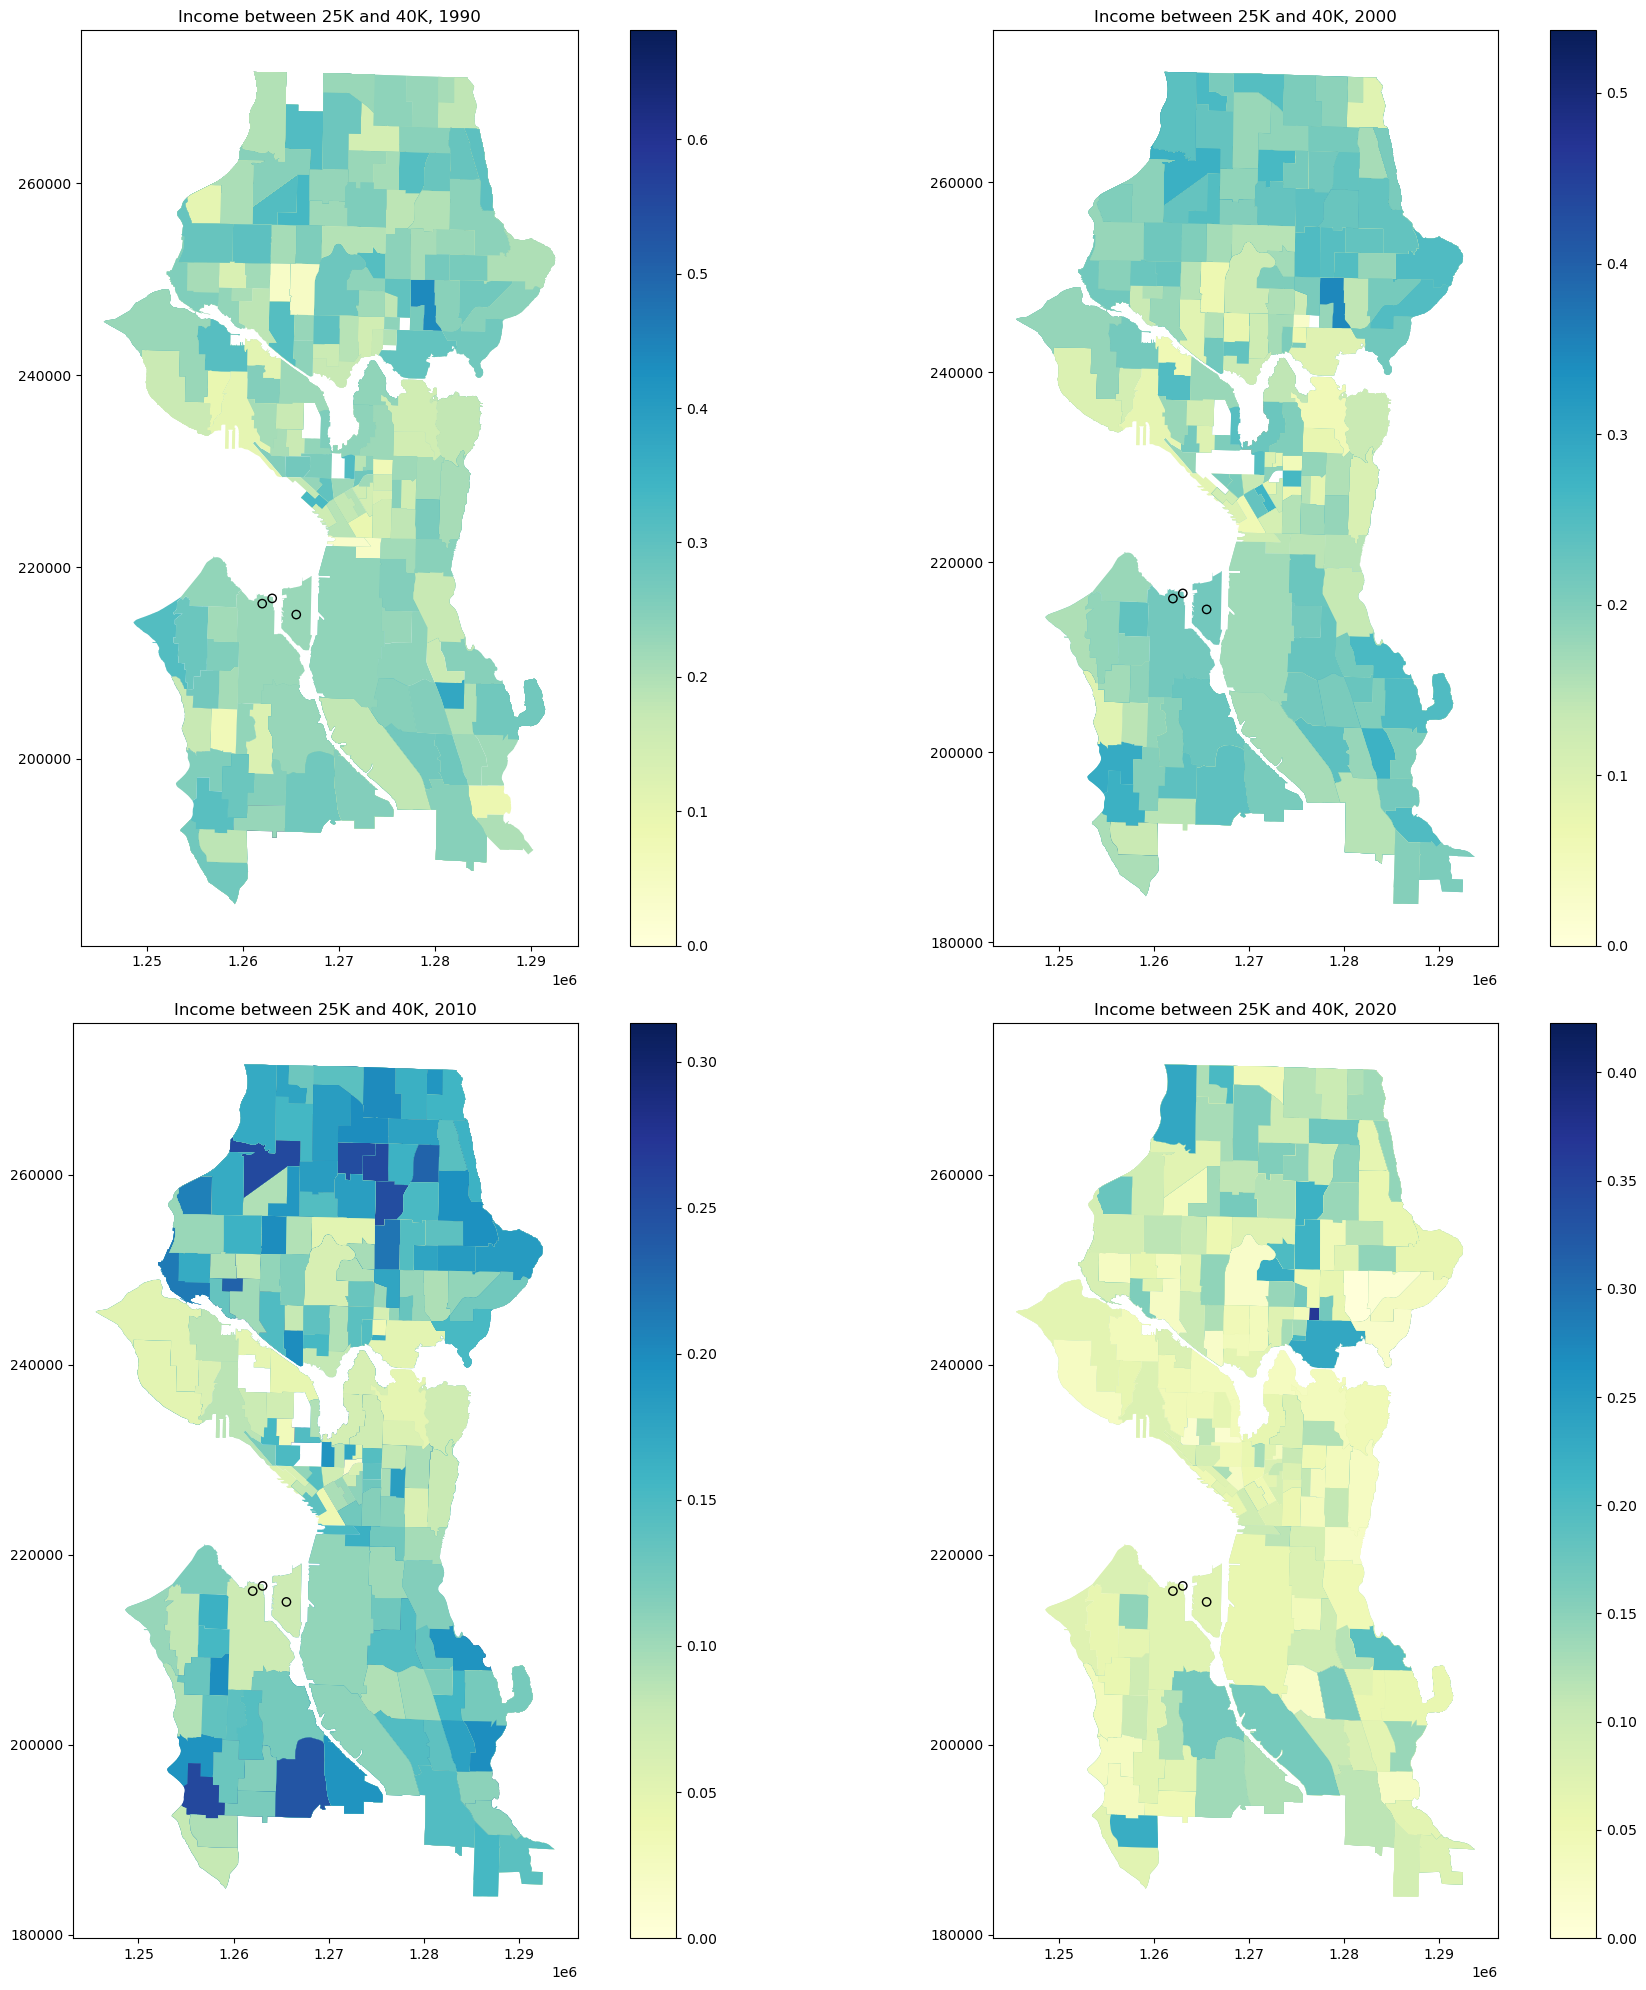

In [33]:
# Adding fixed effects 
fixed_gdf_aea = fixed_gdf_aea.to_crs(sea_income_gdf.crs)
fixed_gdf_aea_clipped = gpd.clip(fixed_gdf_aea, sea_income_gdf)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot per25_39k1990
sea_income_gdf.plot(column='per25_39k1990', ax=axs[0, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 0], color='none', edgecolor='black')
axs[0, 0].set_title('Income between 25K and 40K, 1990')

# Plot per25_39k2000
sea_income_gdf.plot(column='per25_39k2000', ax=axs[0, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 1], color='none', edgecolor='black')
axs[0, 1].set_title('Income between 25K and 40K, 2000')

# Plot per25_39k2010
sea_income_gdf.plot(column='per25_39k2010', ax=axs[1, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 0], color='none', edgecolor='black')
axs[1, 0].set_title('Income between 25K and 40K, 2010')

# Plot per25_39k2020
sea_income_gdf.plot(column='per25_39k2020', ax=axs[1, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 1], color='none', edgecolor='black')
axs[1, 1].set_title('Income between 25K and 40K, 2020')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/25-40kincome_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Income Bracket: Under 25,000

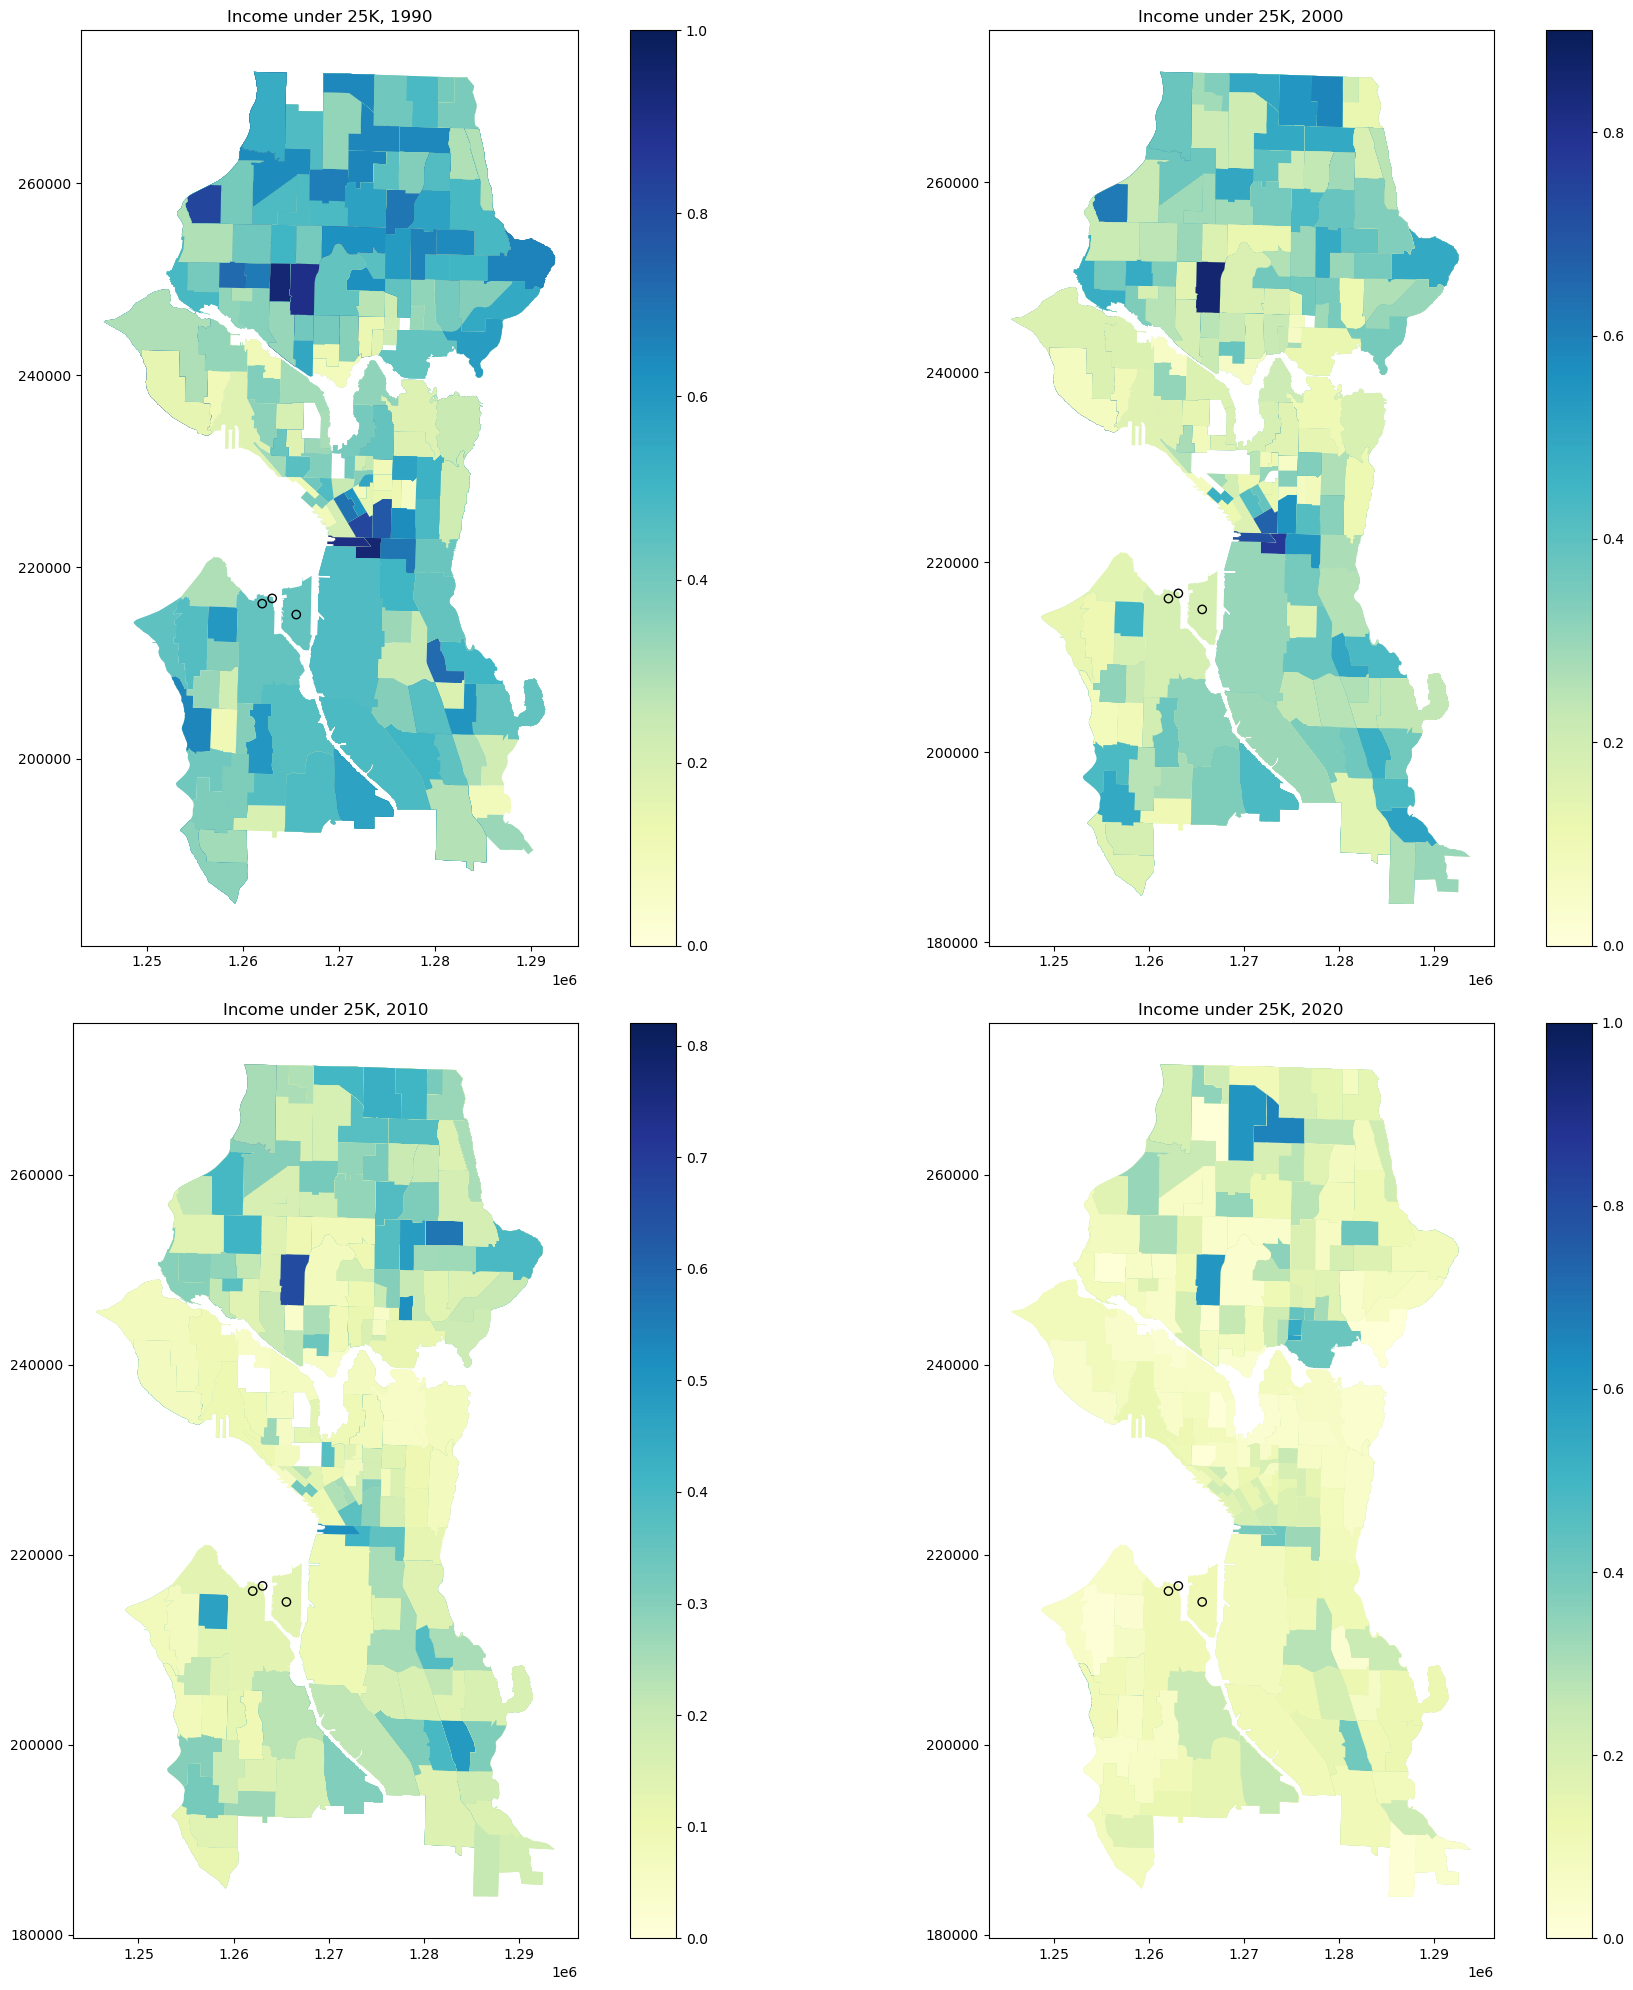

In [34]:
# Adding fixed effects 
fixed_gdf_aea = fixed_gdf_aea.to_crs(sea_income_gdf.crs)
fixed_gdf_aea_clipped = gpd.clip(fixed_gdf_aea, sea_income_gdf)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot perunder25k1990
sea_income_gdf.plot(column='perunder25k1990', ax=axs[0, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 0], color='none', edgecolor='black')
axs[0, 0].set_title('Income under 25K, 1990')

# Plot perunder25k2000
sea_income_gdf.plot(column='perunder25k2000', ax=axs[0, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[0, 1], color='none', edgecolor='black')
axs[0, 1].set_title('Income under 25K, 2000')

# Plot perunder25k2010
sea_income_gdf.plot(column='perunder25k2010', ax=axs[1, 0], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 0], color='none', edgecolor='black')
axs[1, 0].set_title('Income under 25K, 2010')

# Plot perunder25k2020
sea_income_gdf.plot(column='perunder25k2020', ax=axs[1, 1], legend=True, cmap='YlGnBu')
fixed_gdf_aea_clipped.plot(ax=axs[1, 1], color='none', edgecolor='black')
axs[1, 1].set_title('Income under 25K, 2020')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/under25kincome_map.jpg', dpi=300, bbox_inches='tight')
plt.show()